In [1]:
import sys
sys.path

['/Users/dmonte/anaconda3/envs/GP_flow/lib/python36.zip',
 '/Users/dmonte/anaconda3/envs/GP_flow/lib/python3.6',
 '/Users/dmonte/anaconda3/envs/GP_flow/lib/python3.6/lib-dynload',
 '',
 '/Users/dmonte/anaconda3/envs/GP_flow/lib/python3.6/site-packages',
 '/Users/dmonte/anaconda3/envs/GP_flow/lib/python3.6/site-packages/IPython/extensions',
 '/Users/dmonte/.ipython']

In [2]:
import glob
import os

import numpy as np






import sys
import timeit

import shutil
from numpy import *


import re

import matplotlib.pyplot as plt
%matplotlib inline



import os
import pandas as pd
import matplotlib.pyplot as plt

import csv



from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


from sklearn.metrics import mean_squared_error, mean_absolute_error





import glob

import xmltodict

In [3]:
plt.style.use('default')

from matplotlib import colors as mcolors
colors = dict(mcolors.TABLEAU_COLORS)
colors_more=[]
for key in colors:
#     print(key)
    colors_more.append(key)
    
from matplotlib import rc
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import AutoLocator
from matplotlib.ticker import IndexLocator

rc('font',size=14)
rc('font',family='serif')
rc('axes',labelsize=18)



In [4]:

import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.abs((y_true - y_pred) / y_true)

In [5]:
def truncate(n, decimals=0):
    multiplier = 10 ** decimals
    return int(n * multiplier) / multiplier

# Reading in the Parameters

In [6]:
parameters=np.load('spparks_params_training_new_set.npy')

# parameters=parameters[indxs_correct_vf[:-3],:]
parameters.shape

(500, 5)

In [7]:
parameters_test=np.load('spparks_params_testing_new_set.npy')

# parameters=parameters[indxs_correct_vf[:-3],:]
parameters_test.shape

(500, 5)

In [8]:
# making list of parameters files

list_params=[]

for i in range(len(parameters)):
    
    list_params.append('params.in.'+str(i+1))



In [9]:
# list_params

# PCA Data

In [10]:
# space_stats_PCA=np.load('space_stats_PCA_training_LHS_5_lq_correct_vf.npy')
path_training_pca_rep='/Users/dmonte/Desktop/mma_thermal_spray/New_dataset_4_paper/PCA_data/'
space_stats_PCA=np.load(path_training_pca_rep+'space_stats_PCA_training_LHS_5_.npy')
print(space_stats_PCA.shape)

(500, 5)


In [11]:
space_stats_PCA_testing_experiment=np.load(path_training_pca_rep+'space_stats_PCA_testing_LHS_5_experimental.npy')
space_stats_PCA_testing_experiment=space_stats_PCA_testing_experiment[40:,:]
print(space_stats_PCA_testing_experiment.shape)



(300, 5)


In [12]:
space_stats_PCA_testing_computational=np.load(path_training_pca_rep+'space_stats_PCA_testing_LHS_5_computational.npy')
print(space_stats_PCA_testing_computational.shape)

(500, 5)


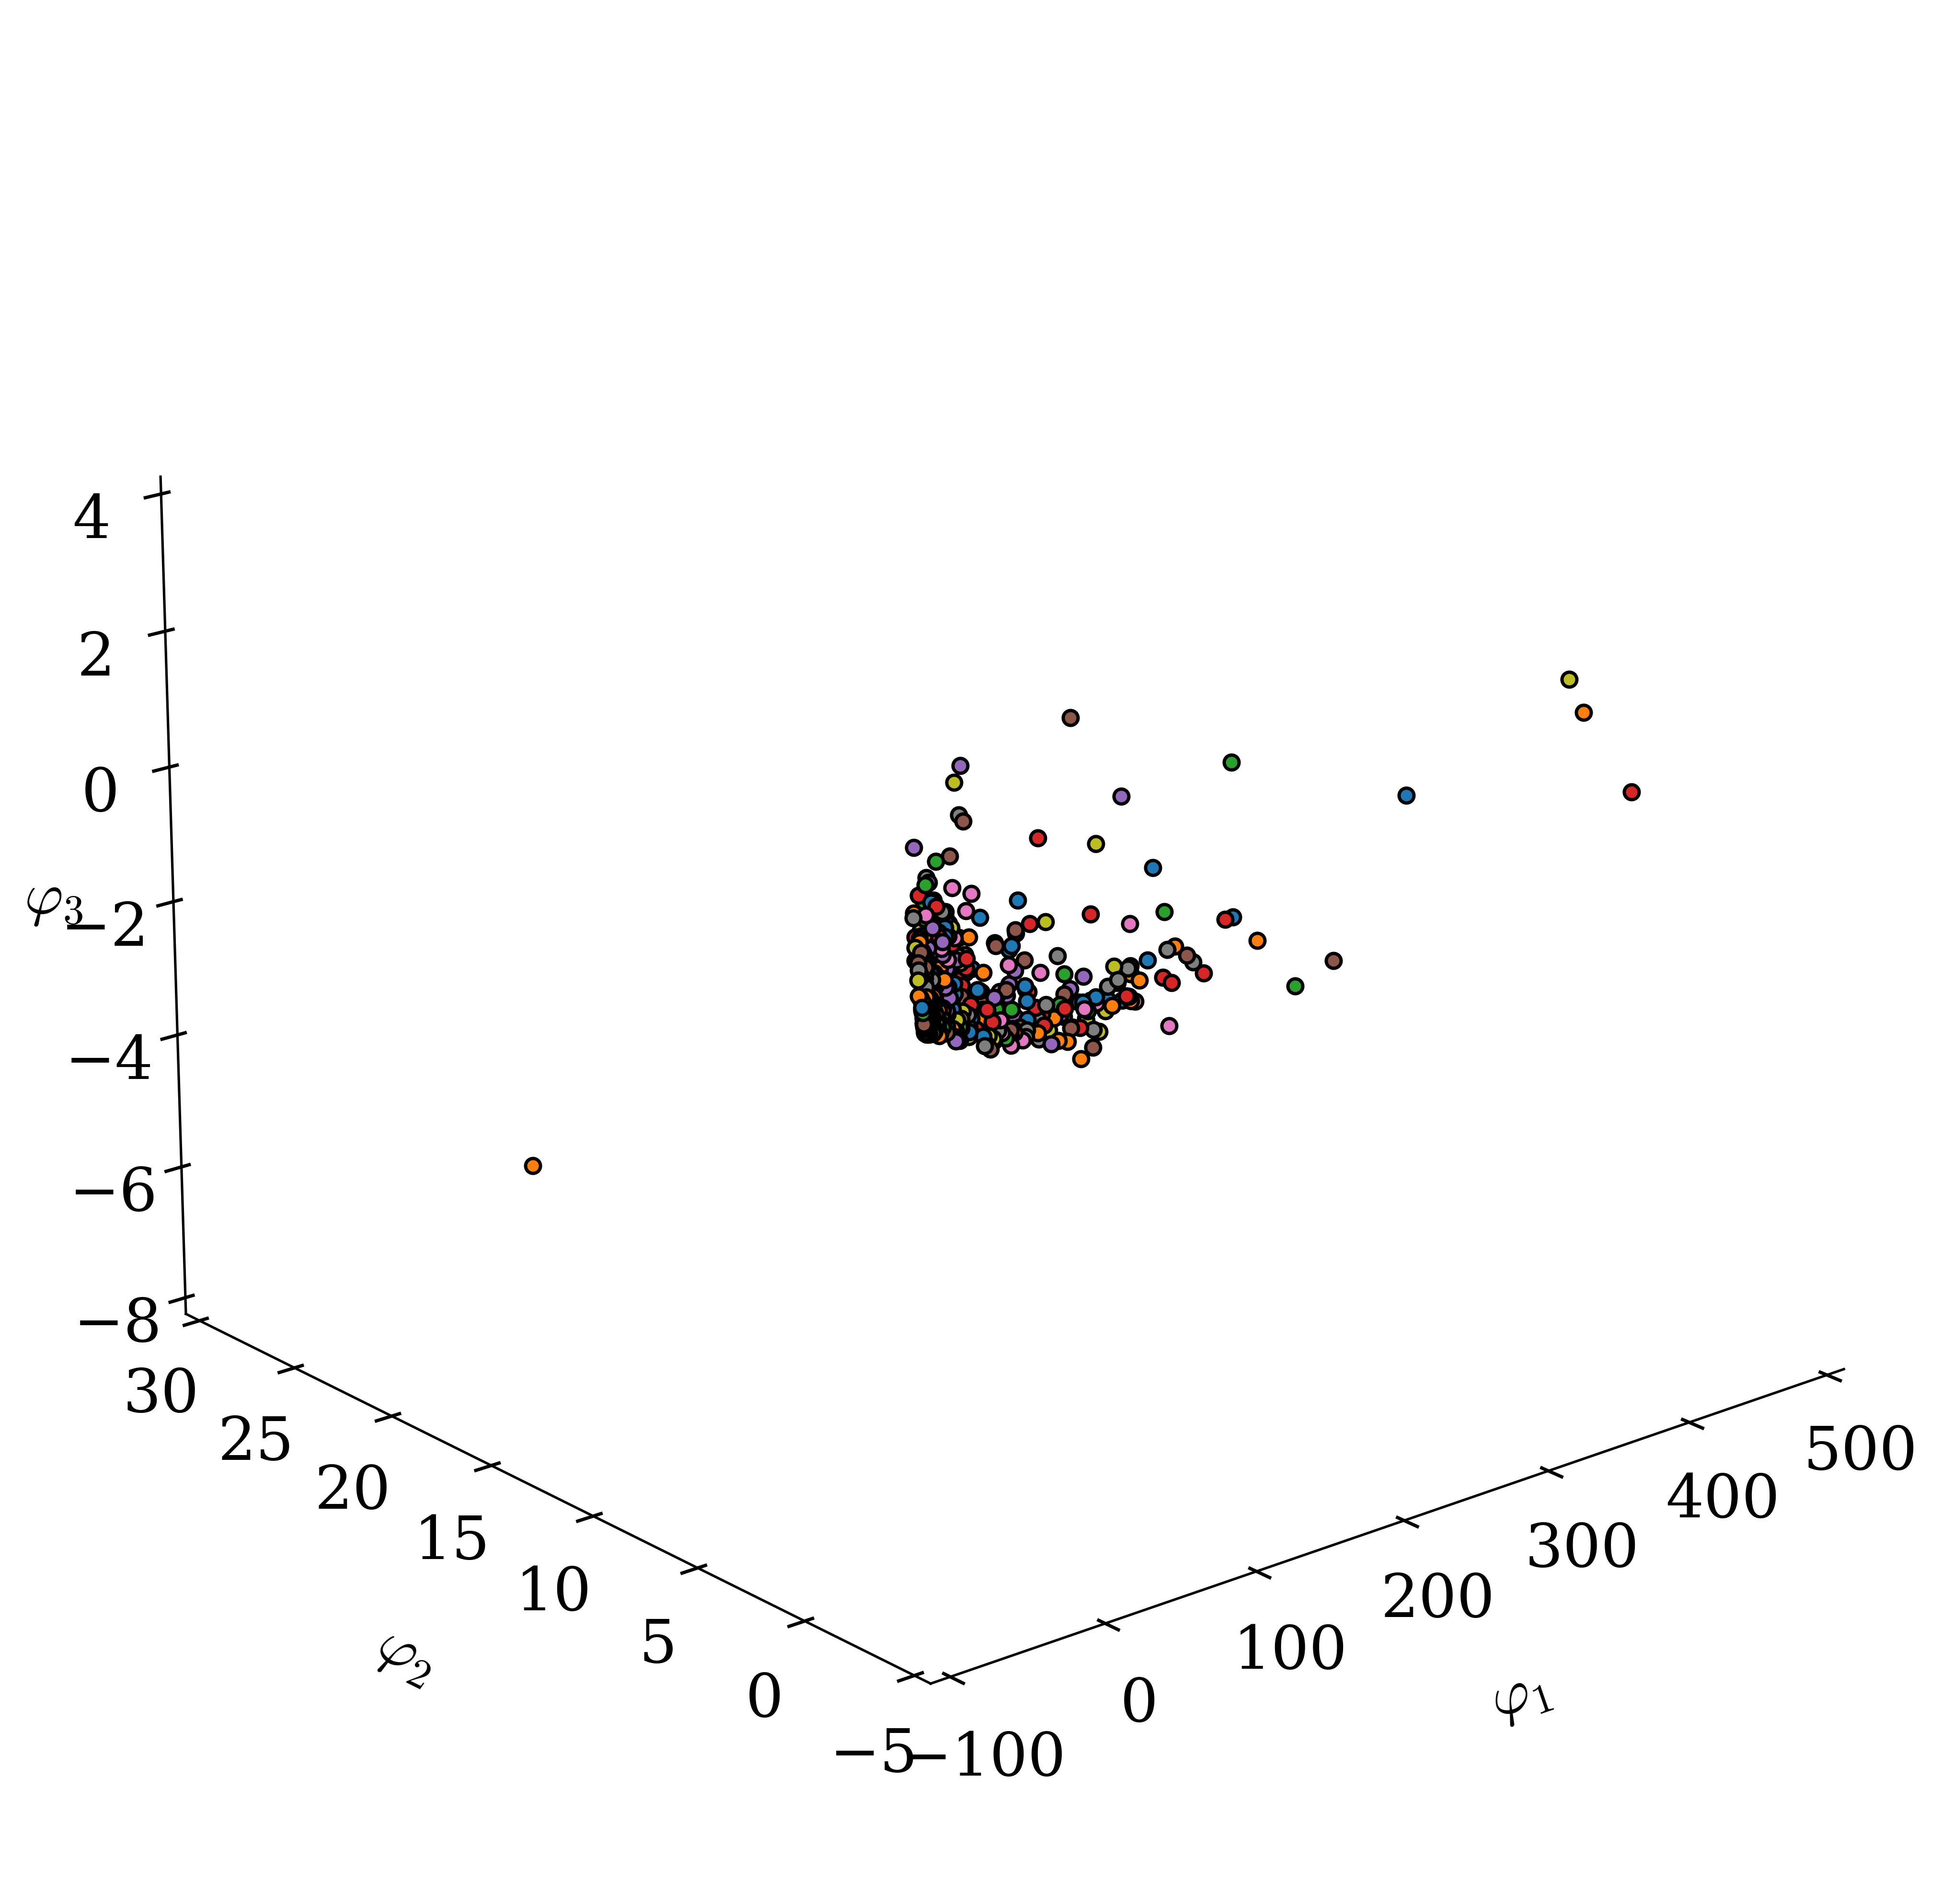

In [13]:
from matplotlib import rc
import matplotlib as mpl
mpl.style.use('classic')
from matplotlib import colors as mcolors
colors = dict(mcolors.TABLEAU_COLORS)
colors_more=[]
for key in colors:
#     print(key)
    colors_more.append(key)
    
from matplotlib import rc
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import AutoLocator
from matplotlib.ticker import IndexLocator
rc('text', usetex=False)
# mpl.style.use('default')

rc('font',size=18)
rc('font',family='serif')
rc('axes',labelsize=18)

mrkrs=[".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_"]
clrs=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w','b', 'g', 'r', 'c', 'm', 'y', 'k', 'w','b', 'g', 'r', 'c', 'm', 'y', 'k', 'w','b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
ndx_color=0

fig = plt.figure(figsize=(10, 10), dpi=500)
fig.patch.set_facecolor('xkcd:white')
ax = fig.add_subplot(111, projection='3d')
ax.zaxis.set_rotate_label(False) 

cnt_vf=0

ndx_color=0

for ndx in range(0,len(space_stats_PCA)):#range(len(indexes)-1):
#    print('ndx',indexes[ndx])
#    print('ndx+1', indexes[ndx+1])

    if ndx_color==len(colors_more)-1:
#         print('reset')
        ndx_color=0

    x =space_stats_PCA[cnt_vf,0]
    y =space_stats_PCA[cnt_vf,1]
    z =space_stats_PCA[cnt_vf,2]



    ax.scatter(x, y, z, c=colors[colors_more[ndx_color]])
    cnt_vf=cnt_vf+1
    ndx_color=ndx_color+1
    

    ax.set_xlabel(r'$\mathbf{\varphi}_1$')
    ax.set_ylabel(r'$\mathbf{\varphi}_2$')
    ax.set_zlabel(r'$\mathbf{\varphi}_3$',rotation=0)
    ax.xaxis.labelpad =20
    ax.yaxis.labelpad =20
    ax.zaxis.labelpad =0
    ax.grid(False)
    ax.xaxis.pane.set_edgecolor('black')
    ax.yaxis.pane.set_edgecolor('black')
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.view_init(elev=20, azim=230)
    ax.xaxis.set_major_locator(AutoLocator())
    ax.yaxis.set_major_locator(AutoLocator())
    ax.zaxis.set_major_locator(AutoLocator())
    ax.set_facecolor('white')

# Get rid of the panes
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# for tick in ax.get_zticklabels():
#     tick.set_rotation(90)
#     fig.set_size_inches(15, 15, forward=True)
#     ndx_color=ndx_color+1

# plt.title('Training PCA Data in 3D')
# legend = plt.legend(loc="best")
# frame = legend.get_frame()
# frame.set_facecolor('white')
# plt.savefig('PCA_3D_no_background.png')
plt.show()


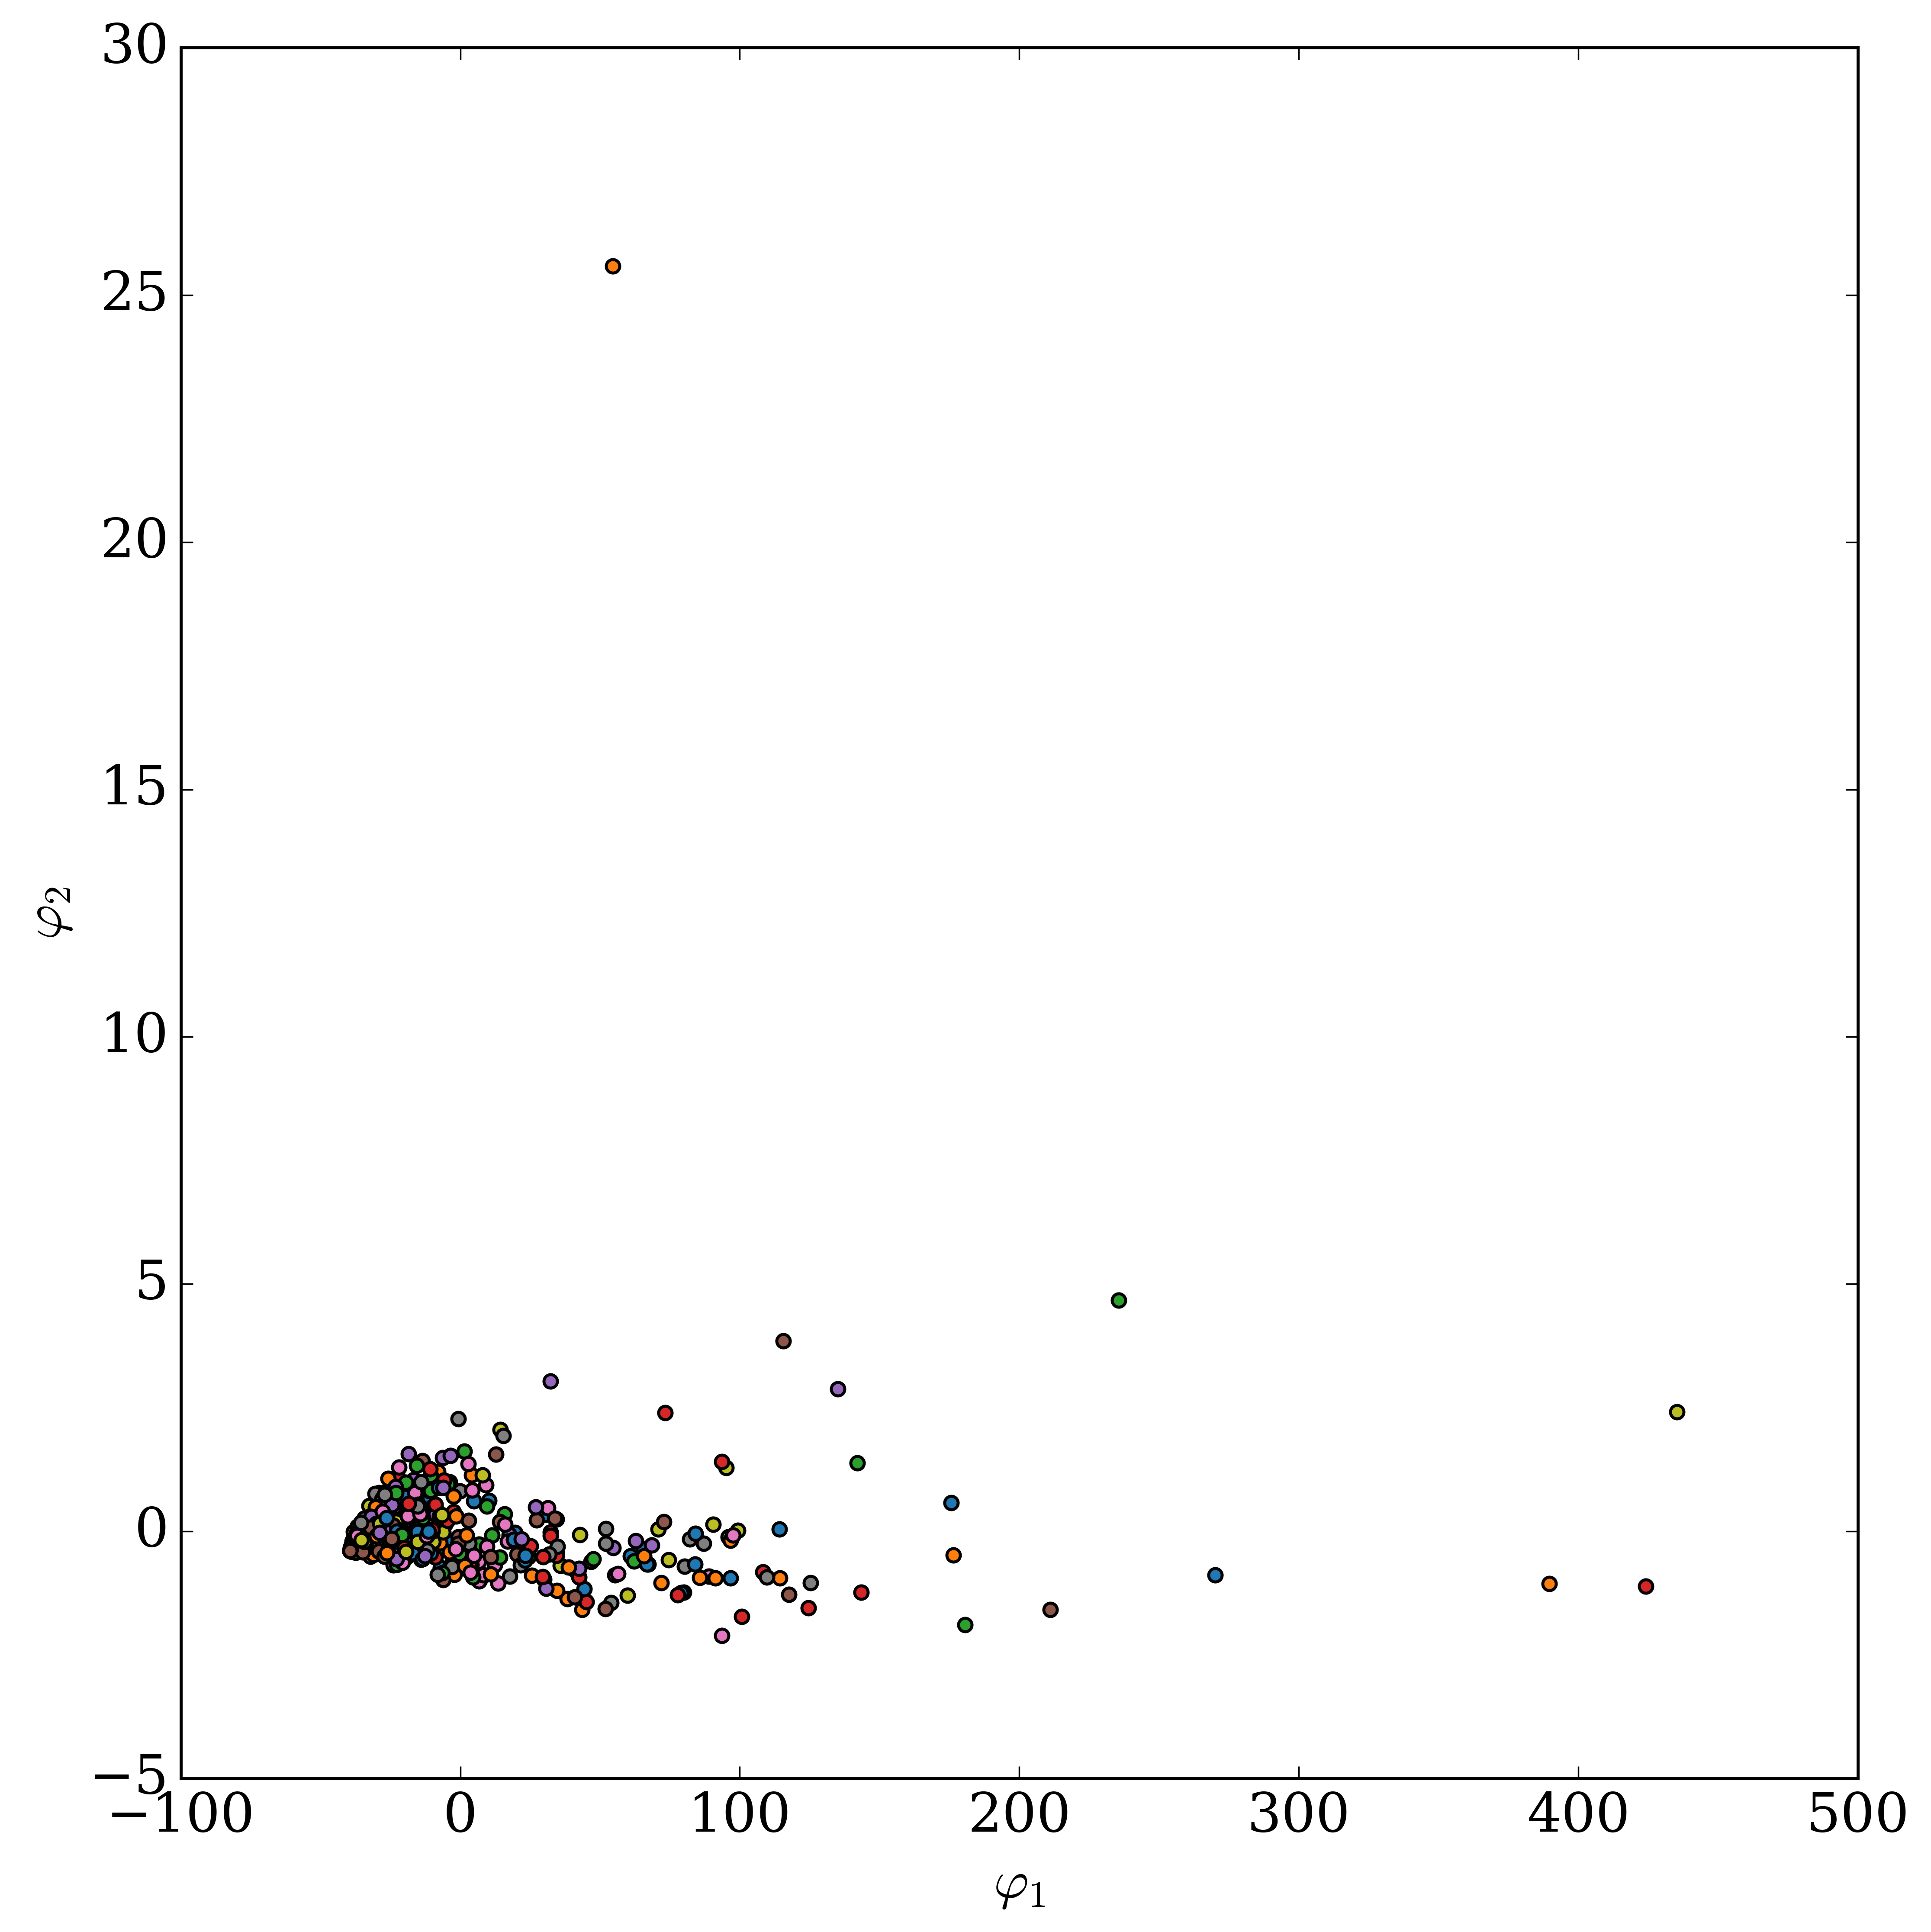

In [14]:
from matplotlib import rc
import matplotlib as mpl
mpl.style.use('classic')
from matplotlib import colors as mcolors
colors = dict(mcolors.TABLEAU_COLORS)
colors_more=[]
for key in colors:
#     print(key)
    colors_more.append(key)
    
from matplotlib import rc
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import AutoLocator
from matplotlib.ticker import IndexLocator
rc('text', usetex=False)
# mpl.style.use('default')

rc('font',size=18)
rc('font',family='serif')
rc('axes',labelsize=18)

mrkrs=[".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_"]
clrs=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w','b', 'g', 'r', 'c', 'm', 'y', 'k', 'w','b', 'g', 'r', 'c', 'm', 'y', 'k', 'w','b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
ndx_color=0

fig = plt.figure(figsize=(10, 10), dpi=500)
fig.patch.set_facecolor('xkcd:white')
# ax = fig.add_subplot(111, projection='3d')
# ax.zaxis.set_rotate_label(False) 

cnt_vf=0

ndx_color=0

for ndx in range(0,len(space_stats_PCA)):#range(len(indexes)-1):
#    print('ndx',indexes[ndx])
#    print('ndx+1', indexes[ndx+1])

    if ndx_color==len(colors_more)-1:
#         print('reset')
        ndx_color=0

    x =space_stats_PCA[cnt_vf,0]
    y =space_stats_PCA[cnt_vf,1]
    z =space_stats_PCA[cnt_vf,2]



    plt.scatter(x, y, c=colors[colors_more[ndx_color]])
    cnt_vf=cnt_vf+1
    ndx_color=ndx_color+1
    

plt.xlabel(r'$\mathbf{\varphi}_1$')
plt.ylabel(r'$\mathbf{\varphi}_2$')


plt.show()


In [15]:
print('These are the PCA coordinates of the outlier')
print(space_stats_PCA[space_stats_PCA[:,1]>25])
print('This is the input file of the outlier')
print(np.array(list_params)[space_stats_PCA[:,1]>25])

print('These are the parameters of the outlier')
print(np.array(parameters)[space_stats_PCA[:,1]>25])
# list_params

These are the PCA coordinates of the outlier
[[54.61843303 25.58105363 -6.3968088   0.39446674  0.76703618]]
This is the input file of the outlier
['params.in.137']
These are the parameters of the outlier
[[2.78025179 0.01372792 0.48899283 3.04871413 1.03361395]]


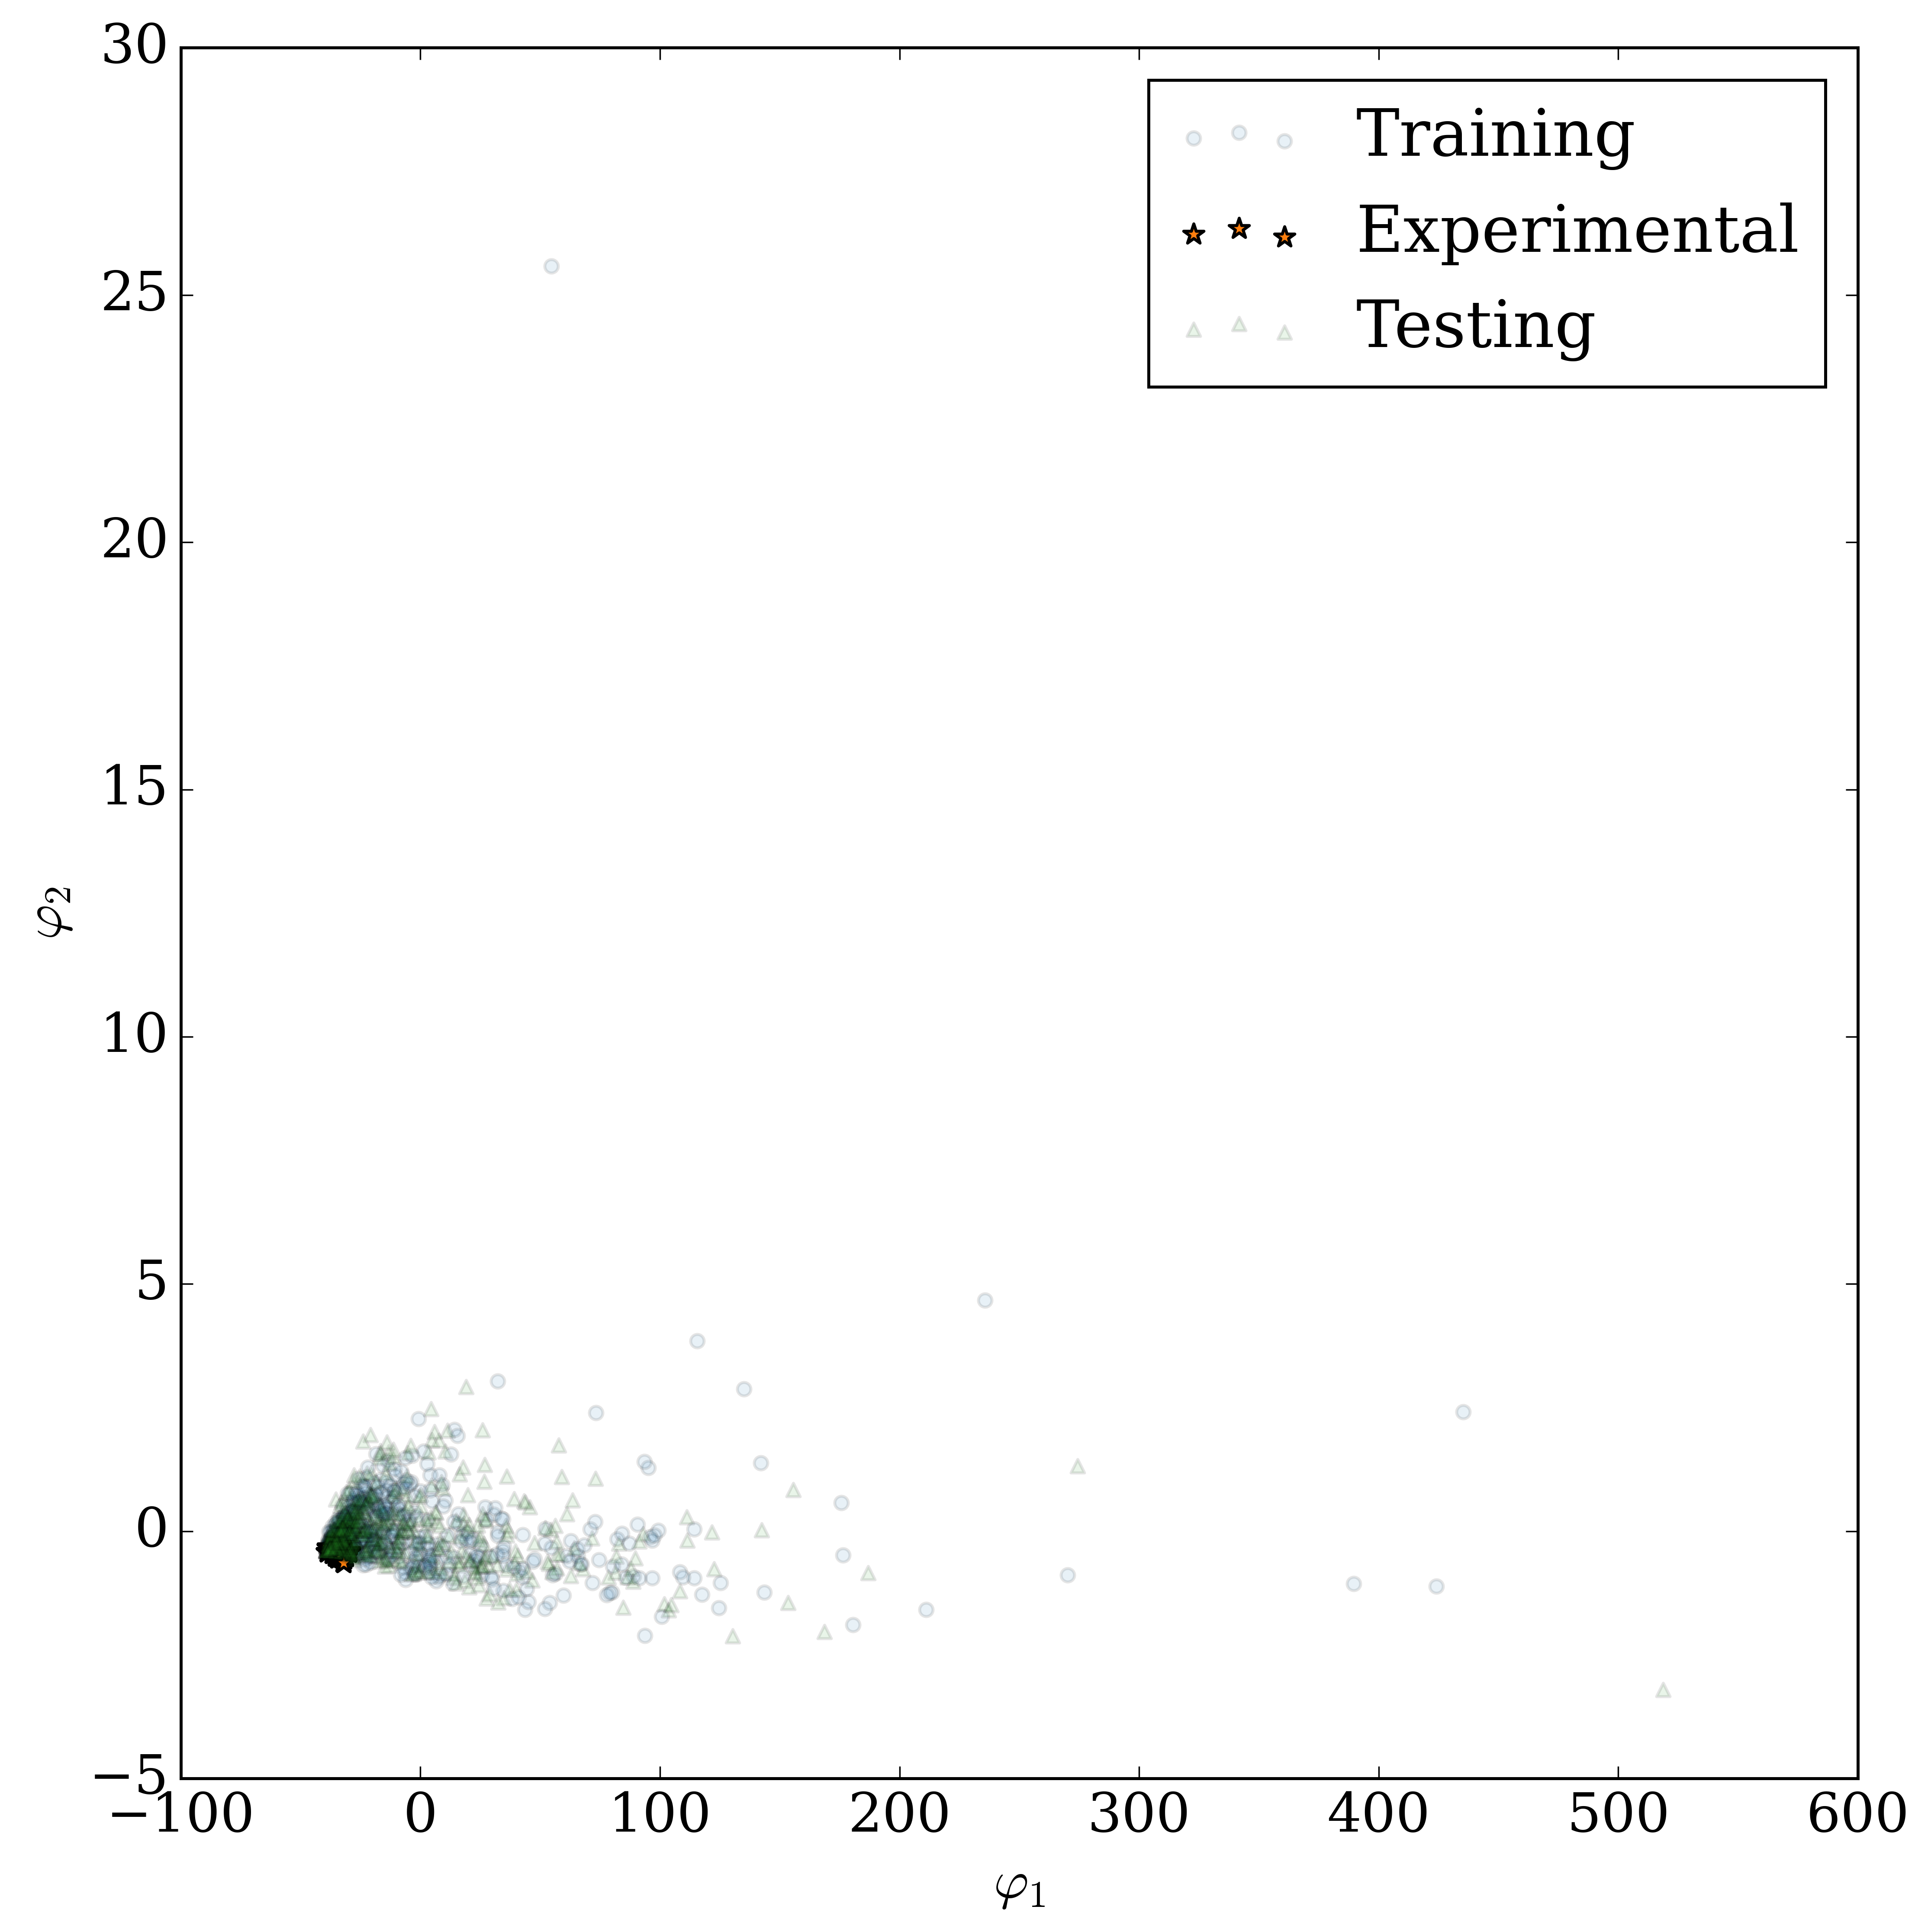

In [16]:
from matplotlib import rc
import matplotlib as mpl
mpl.style.use('classic')
from matplotlib import colors as mcolors
colors = dict(mcolors.TABLEAU_COLORS)
colors_more=[]
for key in colors:
#     print(key)
    colors_more.append(key)
    
from matplotlib import rc
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import AutoLocator
from matplotlib.ticker import IndexLocator
rc('text', usetex=False)
# mpl.style.use('default')

rc('font',size=18)
rc('font',family='serif')
rc('axes',labelsize=18)

mrkrs=[".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_"]
clrs=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w','b', 'g', 'r', 'c', 'm', 'y', 'k', 'w','b', 'g', 'r', 'c', 'm', 'y', 'k', 'w','b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
ndx_color=0

fig = plt.figure(figsize=(10, 10), dpi=500)
fig.patch.set_facecolor('xkcd:white')
# ax = fig.add_subplot(111, projection='3d')
# ax.zaxis.set_rotate_label(False) 

cnt_vf=0

ndx_color=0


x =space_stats_PCA[:,0]
y =space_stats_PCA[:,1]
plt.scatter(x, y, c=colors[colors_more[0]], label='Training',alpha=.1)


x =space_stats_PCA_testing_experiment[:,0]
y =space_stats_PCA_testing_experiment[:,1]
plt.scatter(x, y, c=colors[colors_more[1]],s=50,marker='*',label='Experimental')


x =space_stats_PCA_testing_computational[:,0]
y =space_stats_PCA_testing_computational[:,1]
plt.scatter(x, y, c=colors[colors_more[2]],marker='^',label='Testing',alpha=.1)



plt.xlabel(r'$\mathbf{\varphi}_1$')
plt.ylabel(r'$\mathbf{\varphi}_2$')

plt.legend()
plt.show()


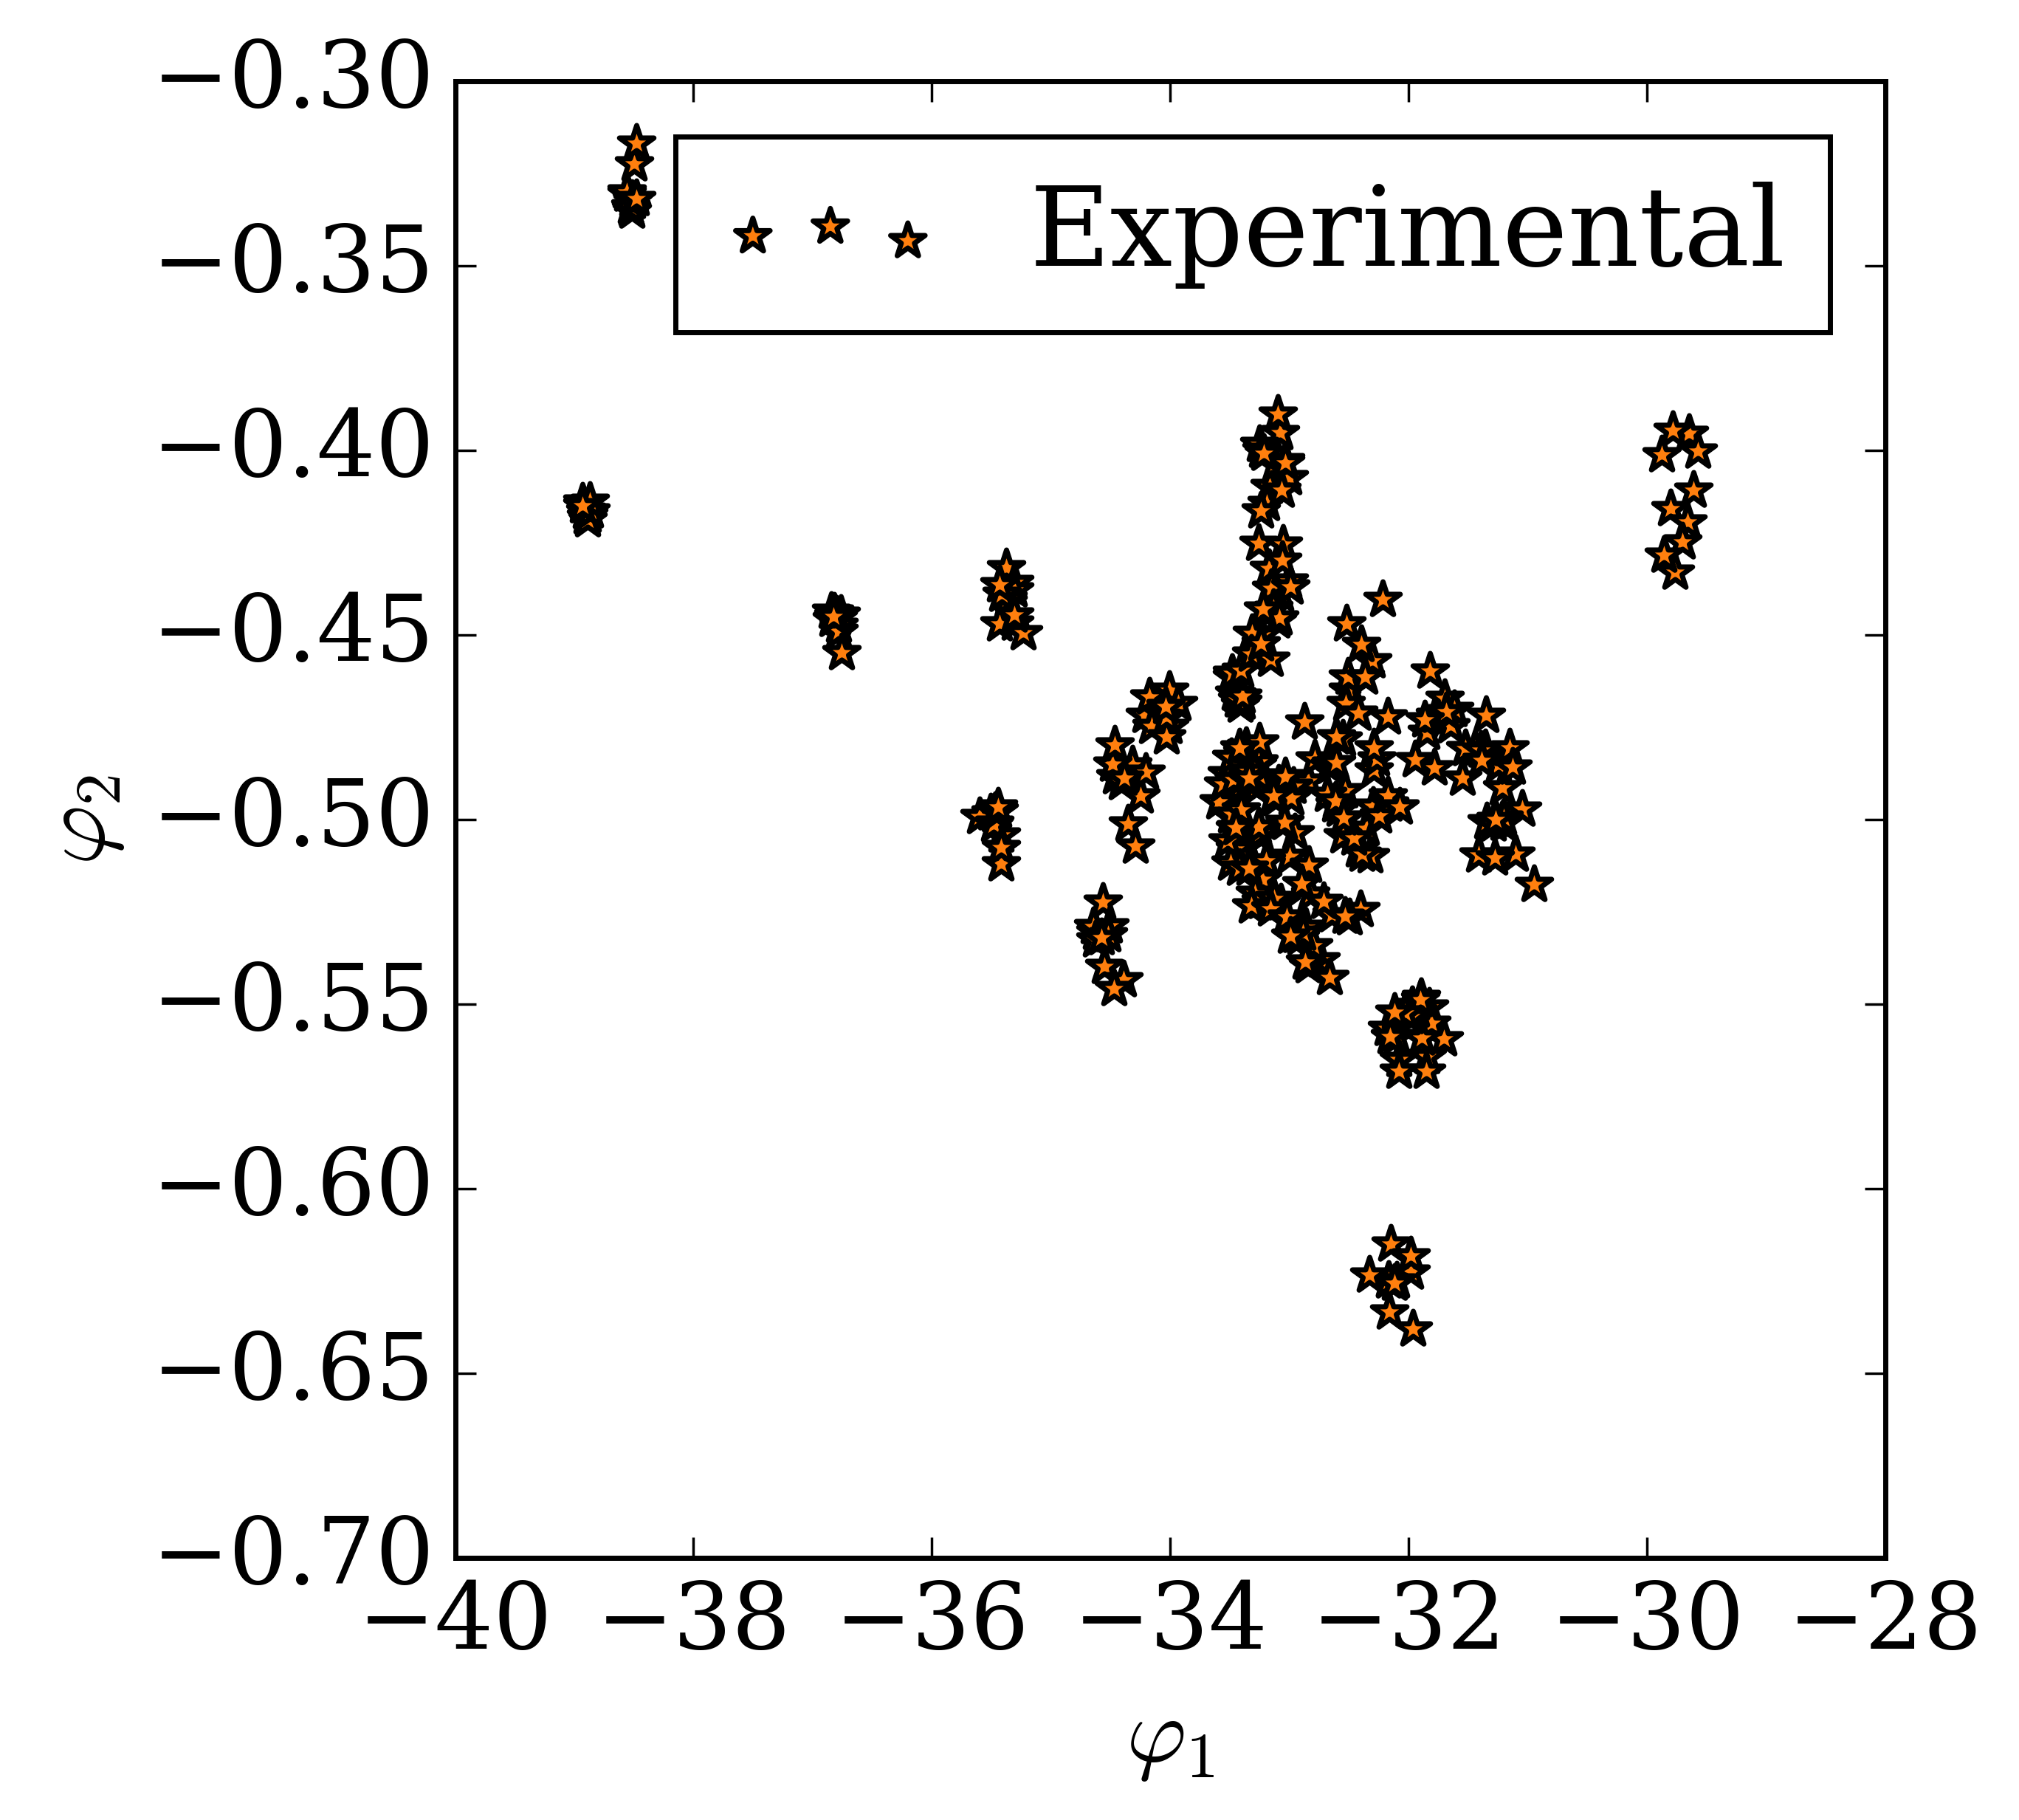

In [17]:
from matplotlib import rc
import matplotlib as mpl
mpl.style.use('classic')
from matplotlib import colors as mcolors
colors = dict(mcolors.TABLEAU_COLORS)
colors_more=[]
for key in colors:
#     print(key)
    colors_more.append(key)
    
from matplotlib import rc
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import AutoLocator
from matplotlib.ticker import IndexLocator
rc('text', usetex=False)
# mpl.style.use('default')

rc('font',size=18)
rc('font',family='serif')
rc('axes',labelsize=18)

mrkrs=[".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_"]
clrs=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w','b', 'g', 'r', 'c', 'm', 'y', 'k', 'w','b', 'g', 'r', 'c', 'm', 'y', 'k', 'w','b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
ndx_color=0

fig = plt.figure(figsize=(5, 5), dpi=500)
fig.patch.set_facecolor('xkcd:white')
# ax = fig.add_subplot(111, projection='3d')
# ax.zaxis.set_rotate_label(False) 

cnt_vf=0

ndx_color=0


# x =space_stats_PCA[:,0]
# y =space_stats_PCA[:,1]
# plt.scatter(x, y, c=colors[colors_more[0]], label='Training',alpha=.1)


x =space_stats_PCA_testing_experiment[:,0]
y =space_stats_PCA_testing_experiment[:,1]
plt.scatter(x, y, c=colors[colors_more[1]],s=50,marker='*',label='Experimental')


# x =space_stats_PCA_testing_computational[:,0]
# y =space_stats_PCA_testing_computational[:,1]
# plt.scatter(x, y, c=colors[colors_more[2]],marker='^',label='Testing',alpha=.1)

# plt.xlim([-100,600])
# plt.ylim([-5,30])

plt.xlabel(r'$\mathbf{\varphi}_1$')
plt.ylabel(r'$\mathbf{\varphi}_2$')

plt.legend()
plt.show()


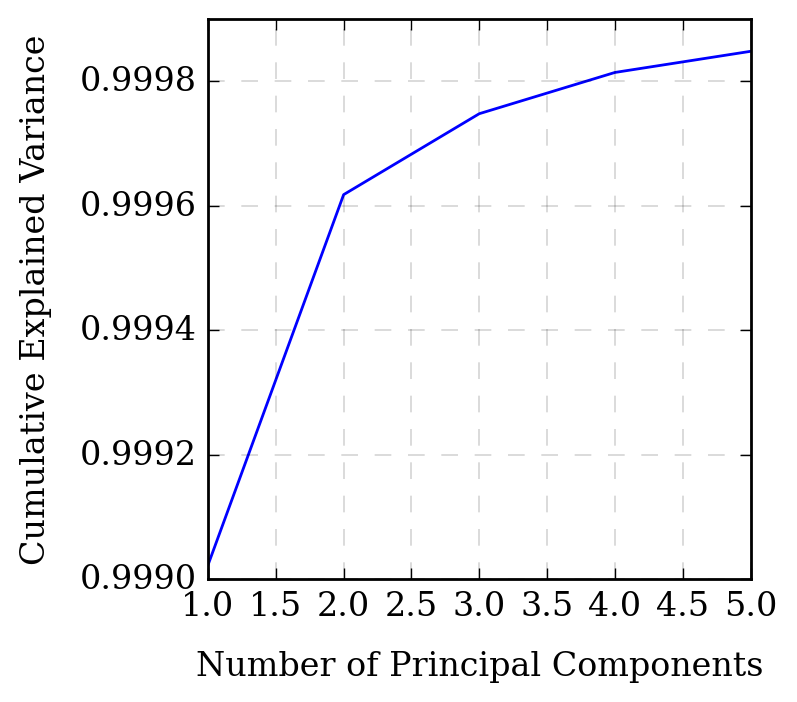

In [18]:
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')

rc('font',size=12)
rc('font',family='serif')
rc('axes',labelsize=12)
rc('text', usetex=False)
# explained_variance_ratio_=np.load('PCA_cum_var_LHS_5_lq_correct_vf.npy')
explained_variance_ratio_=np.load(path_training_pca_rep+'PCA_cum_var_LHS_5_.npy')

fig = plt.figure(figsize=(3.5, 3.5), dpi=200)
fig.patch.set_facecolor('xkcd:white')
ax = fig.add_subplot(111)

ax.plot(np.arange(1,len(explained_variance_ratio_[0:10])+1),np.cumsum(explained_variance_ratio_[0:10]))
ax.set_xlabel('Number of Principal Components')
ax.set_ylabel('Cumulative Explained Variance')
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.grid(True,color='k', linestyle='--', linewidth=.1)

ax.set_facecolor('white')
ax.ticklabel_format(useOffset=False, style='plain')

# Analyzing the vf

In [19]:
# vf_dist=np.load('volume_fraction_pores.npy')
# # vf_dist=vf_dist[indxs_correct_vf[:-3]]

In [21]:
# mpl.style.use('default')
# rc('text', usetex=False)
# rc('font',size=12)
# rc('font',family='serif')
# rc('axes',labelsize=12)

# fig = plt.figure(figsize=(10, 10), dpi=400)
# fig.patch.set_facecolor('white')
# ax = fig.add_subplot(111)

# ax.scatter(np.arange(1,len(vf_dist)+1),vf_dist)



# ax.set_xlabel('Simulation Number')
# ax.set_ylabel('Volume Fraction ')
# # ax.set_ylim([-500,3500])
# ax.xaxis.labelpad = 10
# ax.yaxis.labelpad = 10
# ax.grid(True,color='k', linestyle='--', linewidth=.25)

# ax.set_facecolor('white')

In [22]:
# vf_dist_pd=pd.DataFrame(vf_dist,columns=['VF'])
# vf_dist_pd.hist()

# pearson correlation

In [23]:
col_list=['x1','x2','x3','x4','x5']
df_2_corr_variables=pd.DataFrame(parameters,columns=col_list )
print(df_2_corr_variables.shape)
df_2_corr_variables.head()

(500, 5)


x1        x2        x3        x4        x5
0  3.303197  0.040394  0.027493  2.577594  2.227313
1  4.456396  0.055646  0.246175  2.702486  1.742658
2  3.503368  0.084598  0.366455  4.234427  1.947589
3  4.212177  0.063685  0.013750  3.589262  1.915278
4  2.965103  0.007859  0.425774  2.749471  1.241364

array([[<AxesSubplot:title={'center':'x1'}>,
        <AxesSubplot:title={'center':'x2'}>],
       [<AxesSubplot:title={'center':'x3'}>,
        <AxesSubplot:title={'center':'x4'}>],
       [<AxesSubplot:title={'center':'x5'}>, <AxesSubplot:>]],
      dtype=object)

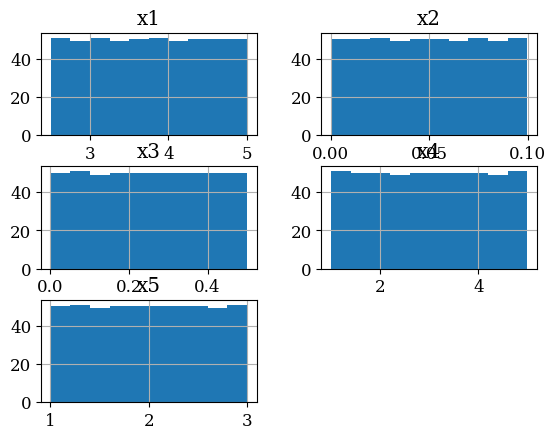

In [24]:
df_2_corr_variables.hist()

In [25]:
tst_df_y=pd.DataFrame(space_stats_PCA[:,0],columns=['Property_2_Predict'] )
print(tst_df_y.shape)
tst_df_y.head()

(500, 1)


Property_2_Predict
0          -15.559848
1          -26.338068
2          -28.320371
3          -33.887617
4          -22.760940

array([[<AxesSubplot:title={'center':'Property_2_Predict'}>]],
      dtype=object)

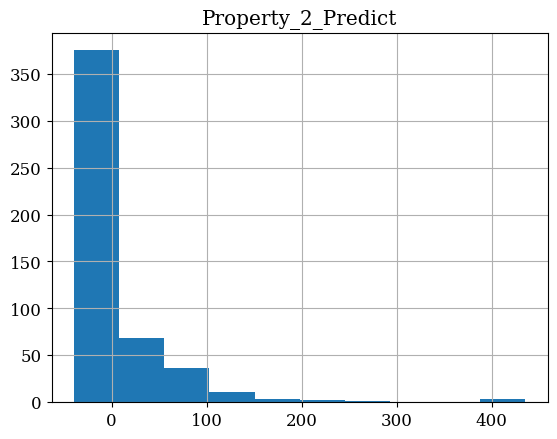

In [26]:
rc('text', usetex=False)
tst_df_y.hist()

In [27]:
tst_df_corr=pd.concat([df_2_corr_variables, tst_df_y], axis=1)
print(tst_df_corr.shape)
tst_df_corr.head()

(500, 6)


x1        x2        x3        x4        x5  Property_2_Predict
0  3.303197  0.040394  0.027493  2.577594  2.227313          -15.559848
1  4.456396  0.055646  0.246175  2.702486  1.742658          -26.338068
2  3.503368  0.084598  0.366455  4.234427  1.947589          -28.320371
3  4.212177  0.063685  0.013750  3.589262  1.915278          -33.887617
4  2.965103  0.007859  0.425774  2.749471  1.241364          -22.760940

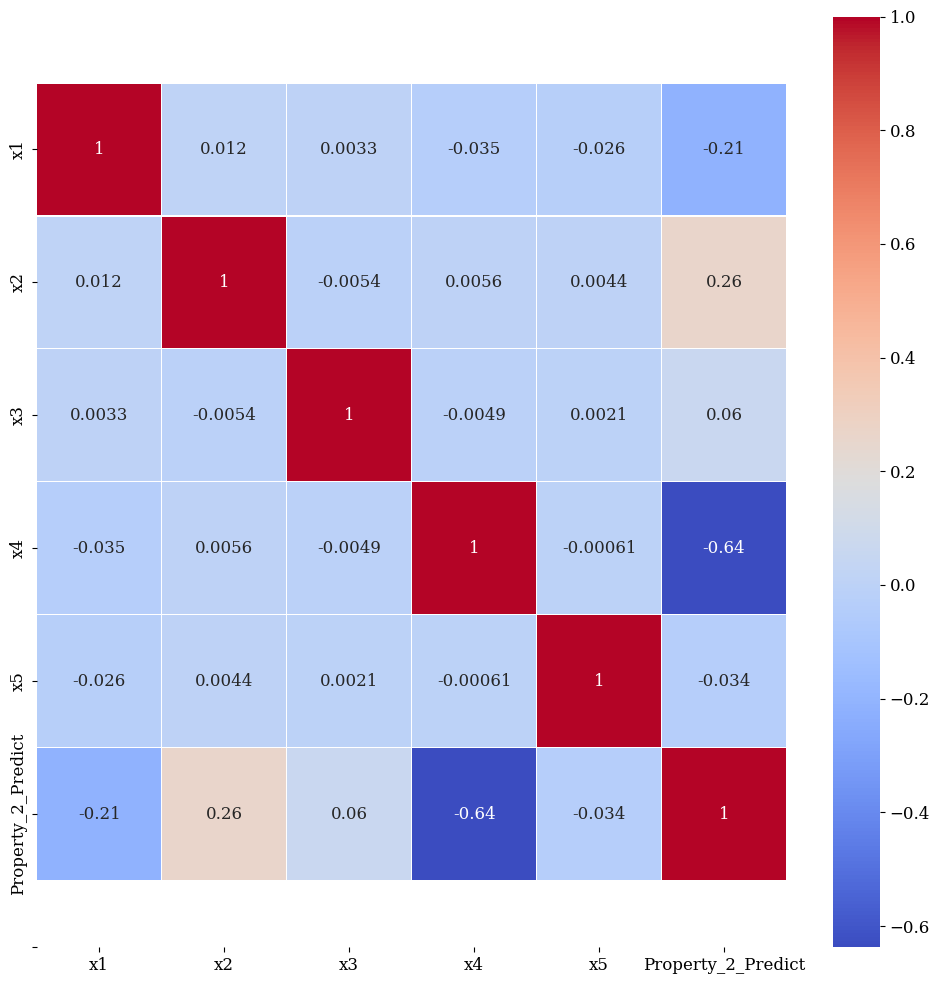

x2                    0.261646
x4                    0.637260
Property_2_Predict    1.000000
Name: Property_2_Predict, dtype: float64

In [28]:
import seaborn as sns
rc('text', usetex=False)

cor=tst_df_corr.corr()

fig = plt.figure()
fig.set_size_inches(10, 10, forward=True)
fig.patch.set_facecolor('white')

ax = sns.heatmap(cor, annot=True,cmap='coolwarm',linewidths=.1) #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# sns.heatmap(cor, annot=True, cmap='coolwarm',linewidths=.1,square=True)

ax.yaxis.set_major_locator(IndexLocator(base=1, offset=0.5))

ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
plt.tight_layout()
plt.show()

#Correlation with output variable
thr=.25
cor_target = abs(cor['Property_2_Predict'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>thr]
relevant_features

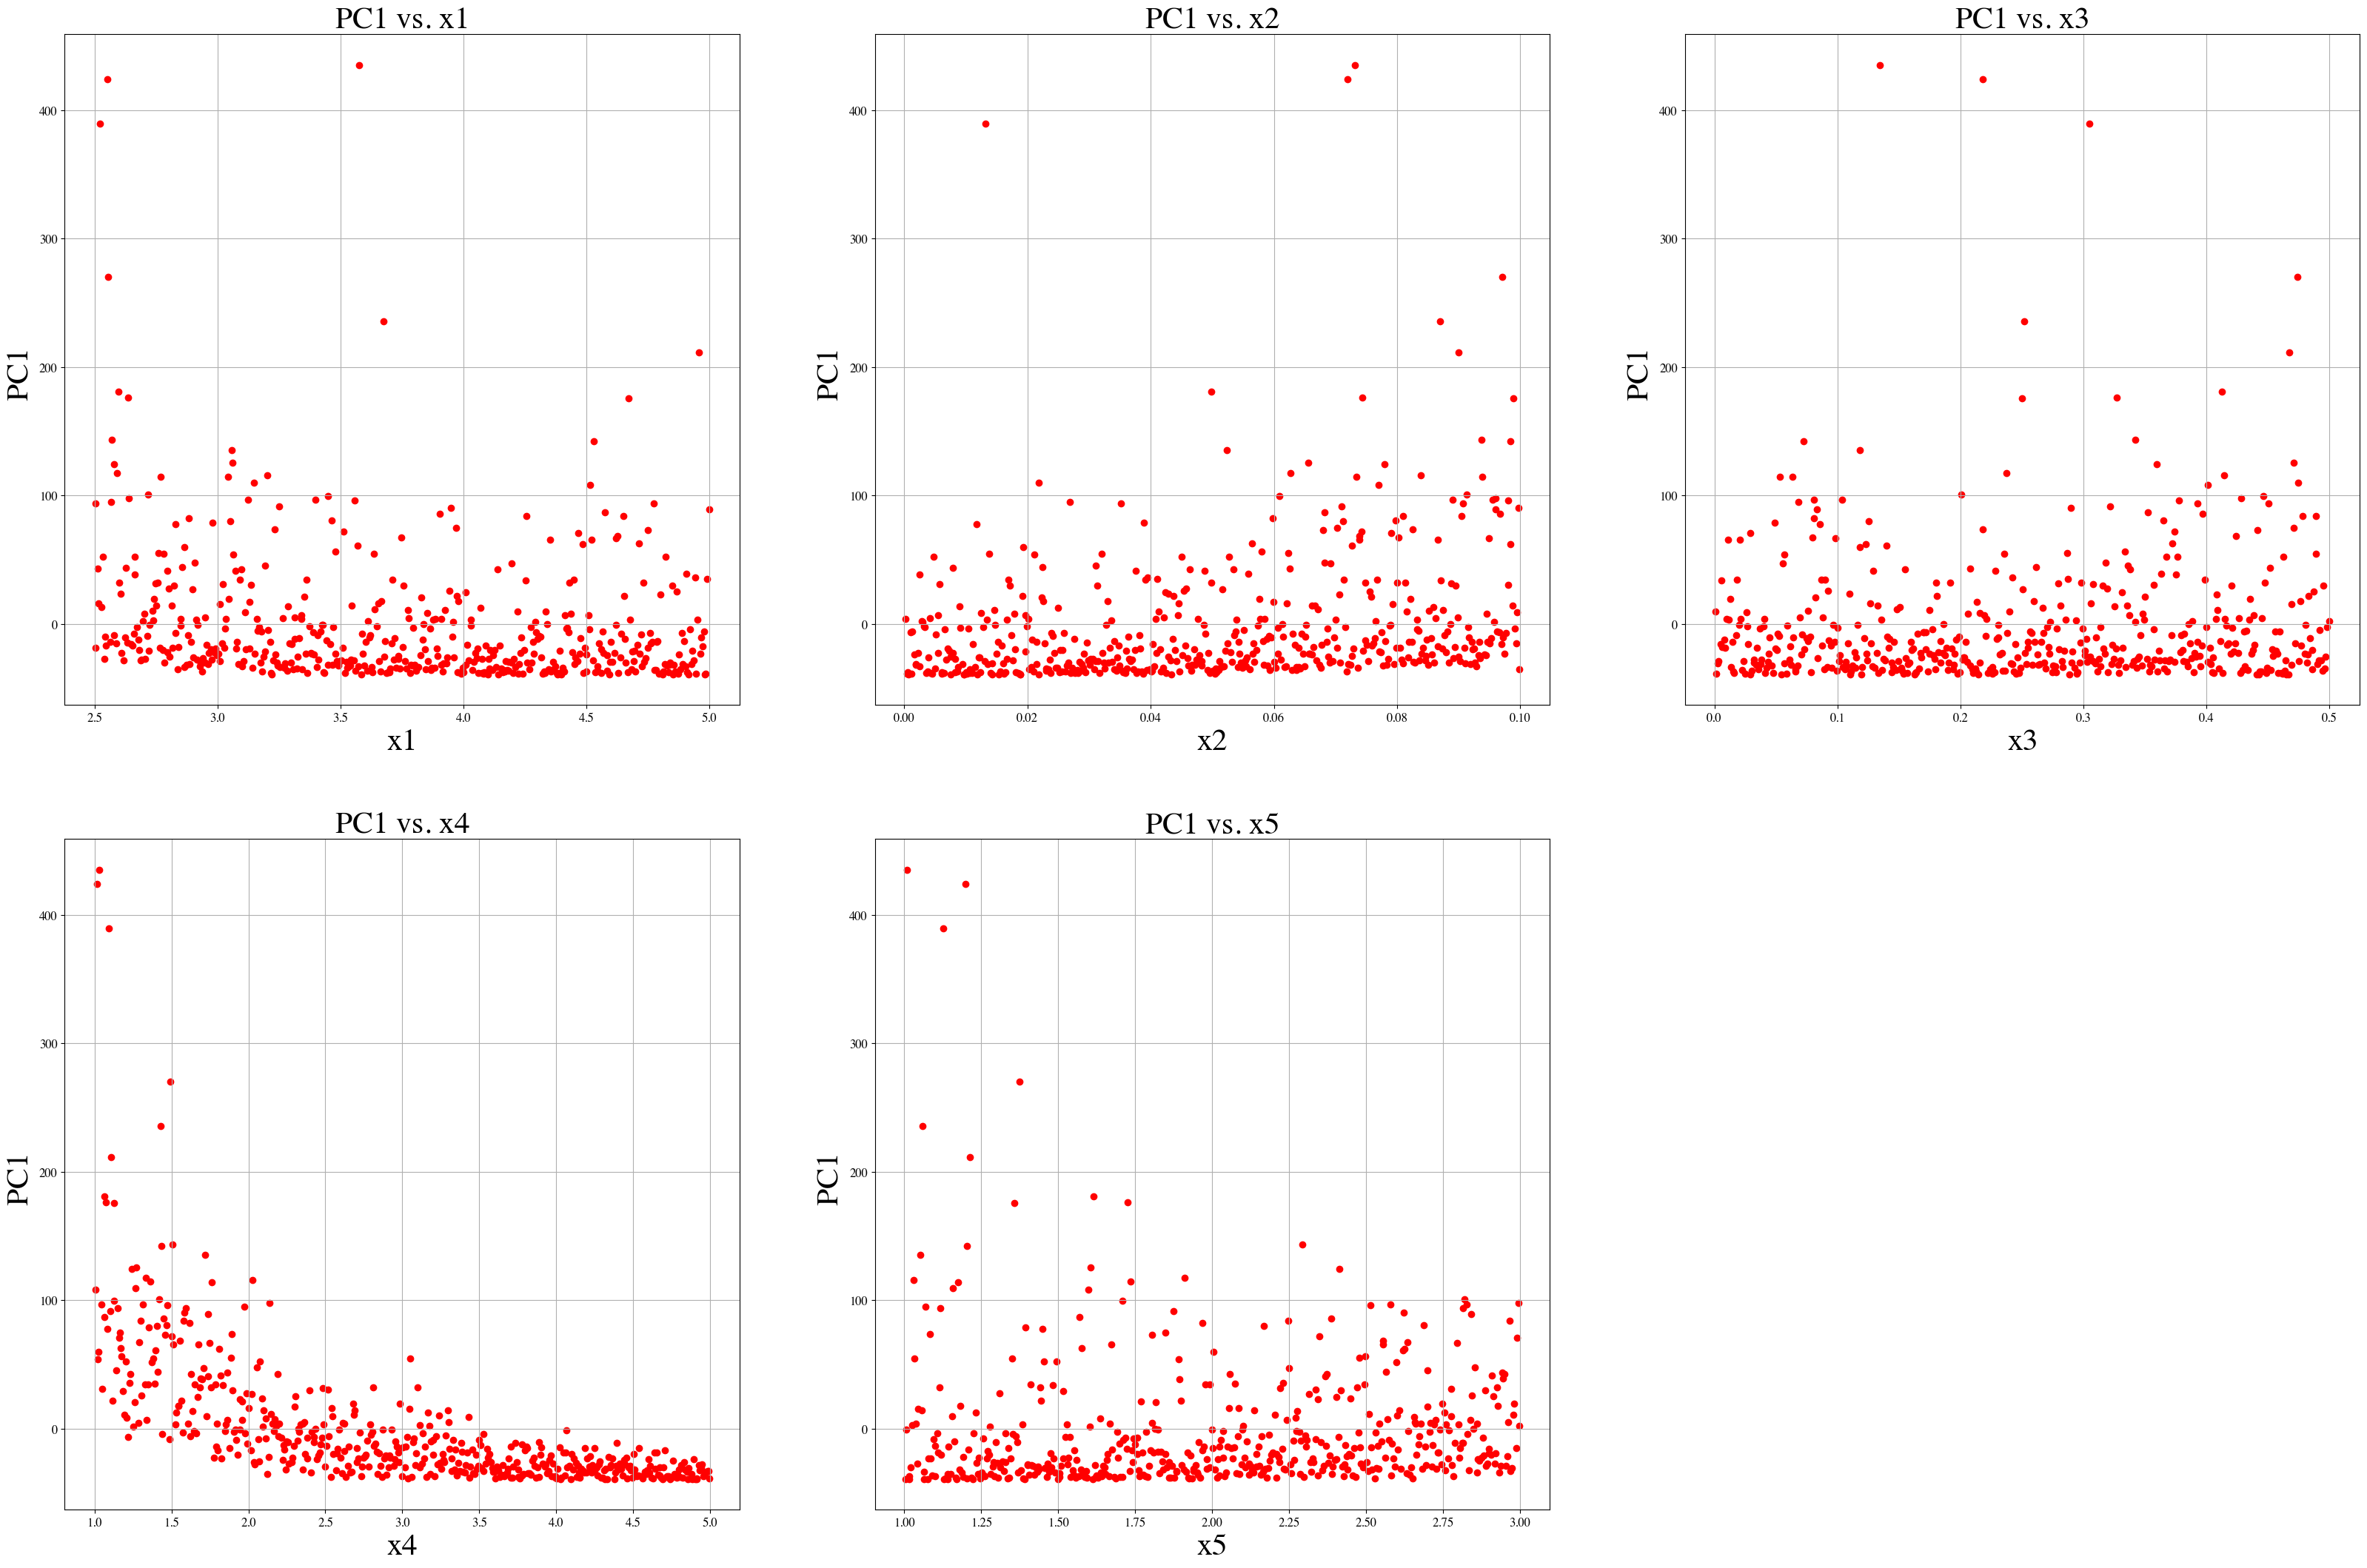

In [29]:
fig=plt.figure(figsize=(40, 40),facecolor='w', edgecolor='k')
fig.patch.set_facecolor('xkcd:white')
plt.rc('font', family='serif', serif='Times')


rowCnt = 3#len(df_2_corr_variables.columns)
colCnt = 3    # cols:  overall, no disease, disease
subCnt = 1     # initialize plot number


High_PC_features=list(cor_target.keys())


for i in High_PC_features[:-1]:
    # OVERALL subplots
    fig.add_subplot(rowCnt, colCnt, subCnt,facecolor='white')
#     fig.patch.set_facecolor('xkcd:white')
    plt.title('PC1 vs. '+ i, fontsize=30)
    plt.xlabel(i, fontsize=30)
    plt.ylabel('PC1 ',fontsize=30)
#     sns.countplot(df[i], hue=df.sex)
    plt.scatter(df_2_corr_variables[i],tst_df_y['Property_2_Predict'],color='r')
    plt.grid(True)
#     legend = plt.legend(loc="upper left")
#     frame = legend.get_frame()
#     frame.set_facecolor('white')
    subCnt = subCnt + 1

# Building Surrogate Base Model

## Gaussian Process with Mater 5/2 Kernel

# Making training and Testing Sets

In [30]:
X=tst_df_corr[['x1','x2','x3','x4','x5']].values
Y=tst_df_corr['Property_2_Predict'].values

print(Y.max())

435.2734621799416


In [31]:
space_stats_training_less_poly=X
gb_energy_train=Y
print(space_stats_training_less_poly.shape, gb_energy_train.shape)

(500, 5) (500,)


In [32]:
print(gb_energy_train.max())

435.2734621799416


In [33]:
space_stats_testing_less_poly_unnorm=parameters_test
gb_energy_test_average=space_stats_PCA_testing_computational[:,0]

print(space_stats_testing_less_poly_unnorm.shape,gb_energy_test_average.shape)
print(gb_energy_test_average.max(),gb_energy_test_average.min())

(500, 5) (500,)
518.7808870813216 -39.50059725219305


Mean of training PC1 : 4.68389771413058e-14
Standard deviation of PC1 : 55.36802339263378
Mean of testing PC1 : -4.827550300447443
Standard deviation of PC1 : 46.43839339952926


/Users/dmonte/anaconda3/envs/GP_flow/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/dmonte/anaconda3/envs/GP_flow/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, '$\\mathbf{\\varphi}_1$')

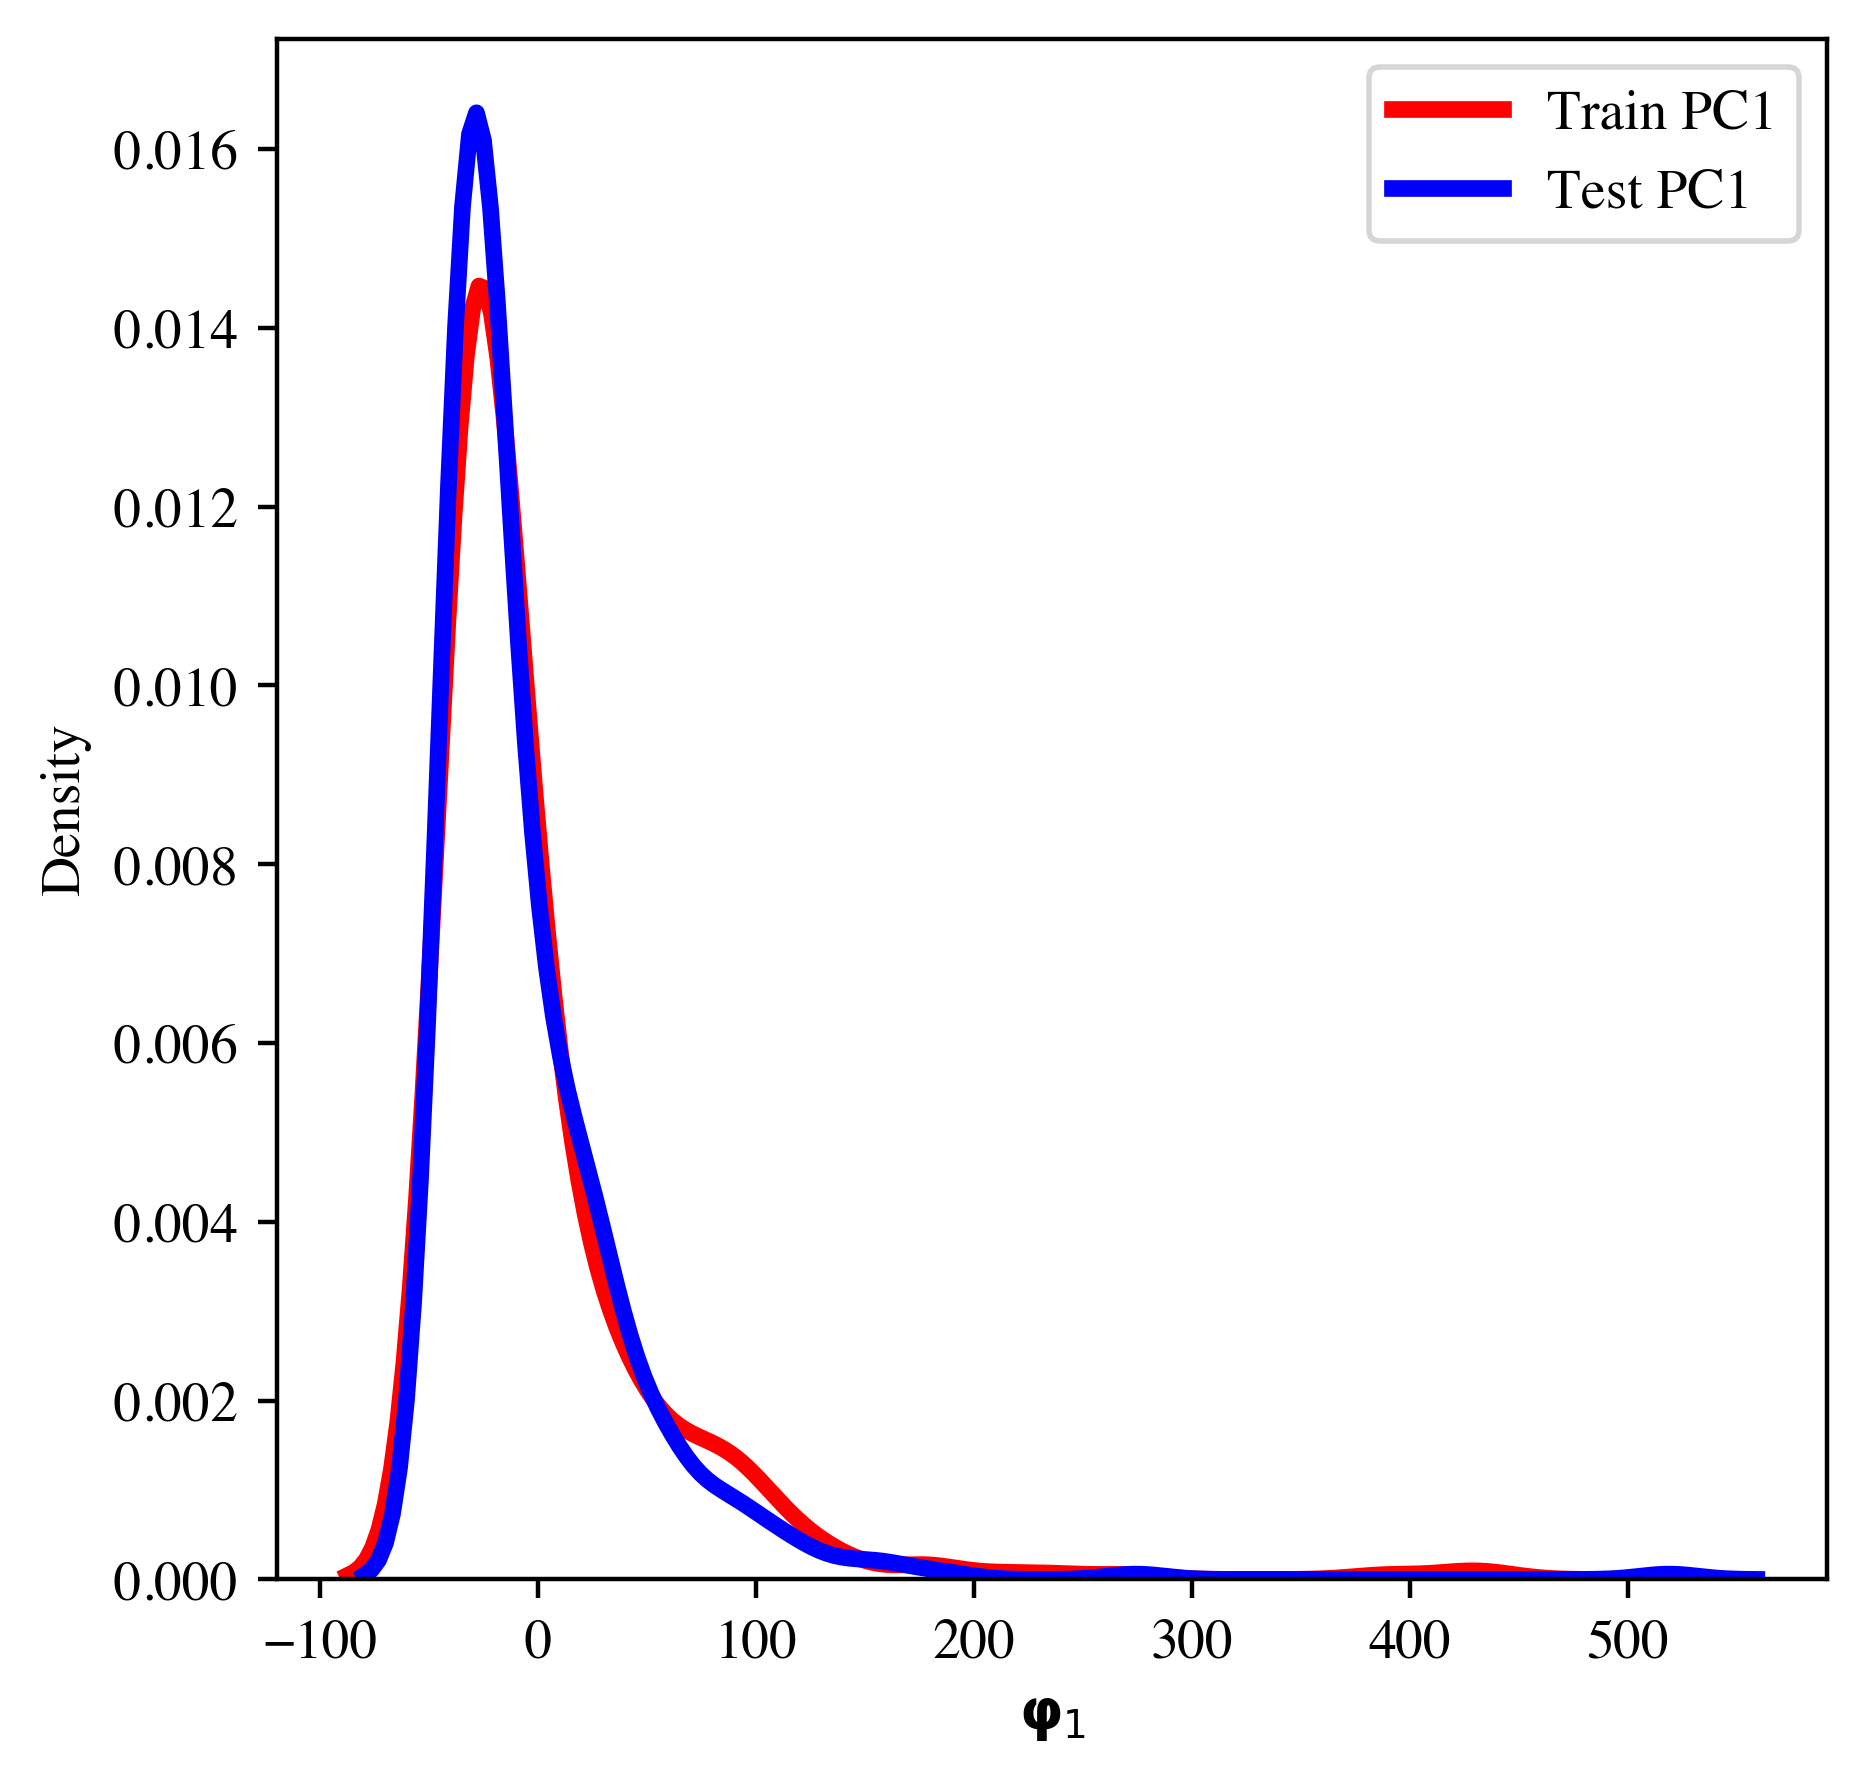

In [34]:
#Quantile Scaler

rc('font',size=10)
rc('font',family='serif')
rc('axes',labelsize=10)
rc('text', usetex=False)
fig = plt.figure(figsize=(5, 5), dpi=400)
fig.patch.set_facecolor('xkcd:white')


columns_new=['Train PC1']
predicted_tensile_strength_df=pd.DataFrame(gb_energy_train, columns=columns_new)
airline=columns_new[0]
sns.distplot(predicted_tensile_strength_df[airline], hist = False, kde = True,kde_kws = {'linewidth': 3},label = airline,color='r')

print('Mean of training PC1 :', predicted_tensile_strength_df[airline].mean())
print('Standard deviation of PC1 :', predicted_tensile_strength_df[airline].std())

columns_new=['Test PC1']
predicted_tensile_strength_df=pd.DataFrame(gb_energy_test_average, columns=columns_new)
airline=columns_new[0]
sns.distplot(predicted_tensile_strength_df[airline], hist = False, kde = True,kde_kws = {'linewidth': 3},label = airline,color='b')

print('Mean of testing PC1 :', predicted_tensile_strength_df[airline].mean())
print('Standard deviation of PC1 :', predicted_tensile_strength_df[airline].std())

plt.legend()
plt.xlabel(r'$\mathbf{\varphi}_1$')

Mean of testing PC1 : -33.42044053179361
Standard deviation of PC1 : 1.9658038305478078


/Users/dmonte/anaconda3/envs/GP_flow/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, '$\\mathbf{\\varphi}_1$')

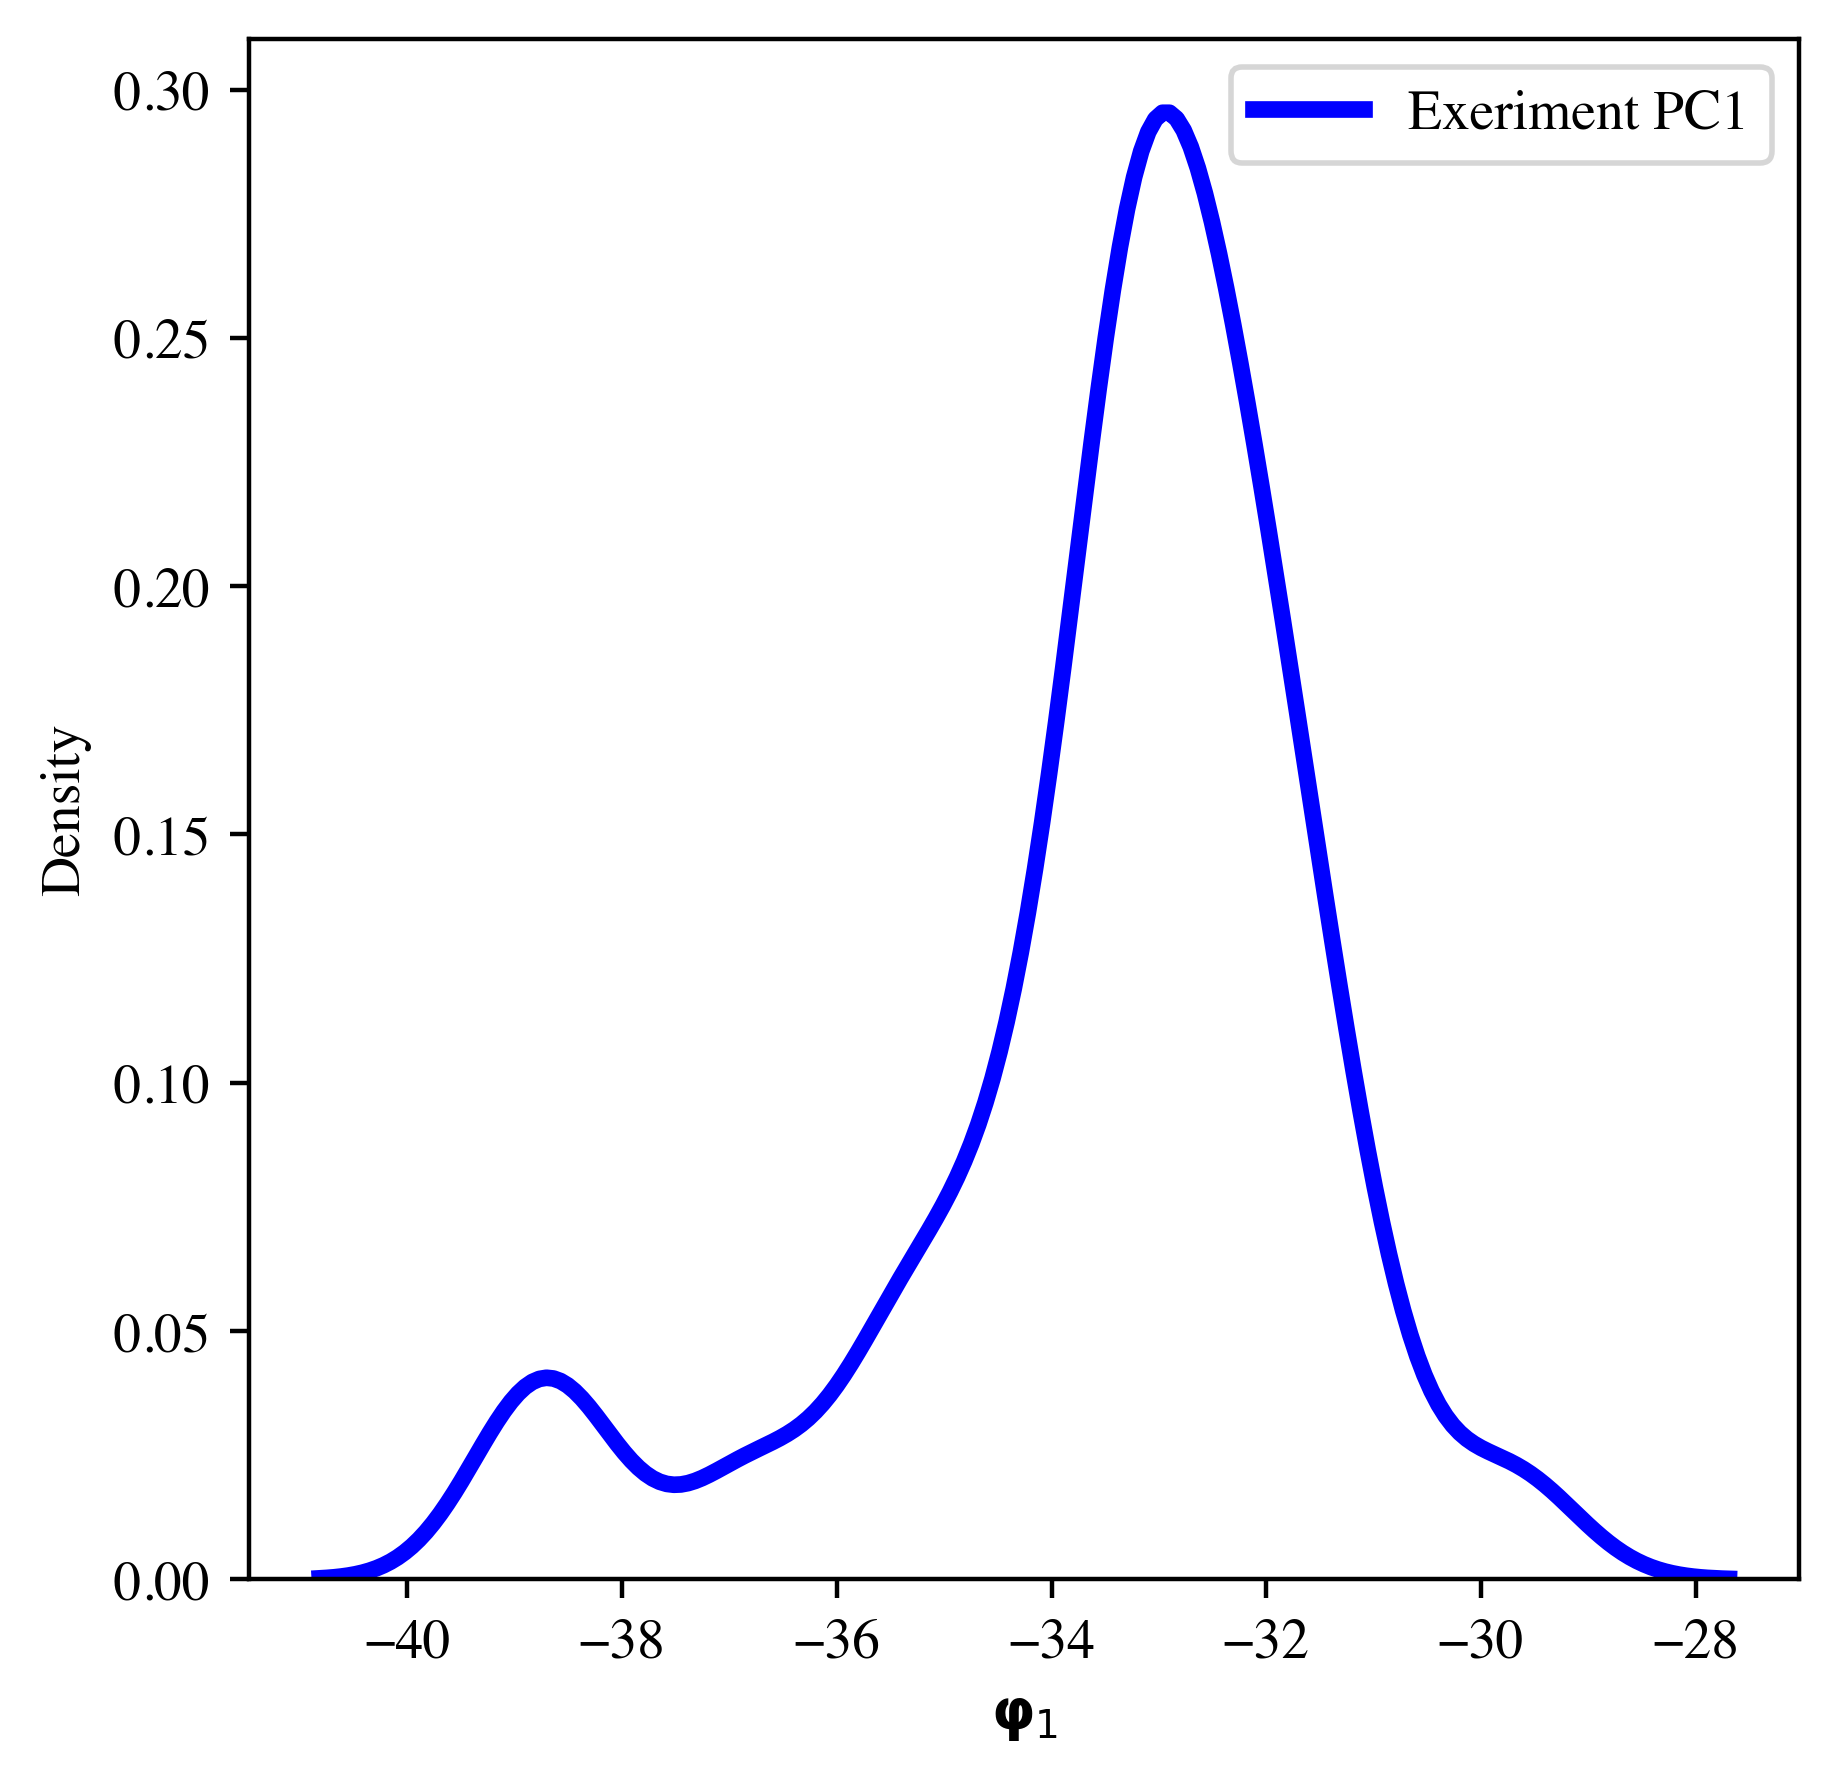

In [35]:
#Quantile Scaler
import seaborn as sns
rc('font',size=10)
rc('font',family='serif')
rc('axes',labelsize=10)
rc('text', usetex=False)
fig = plt.figure(figsize=(5, 5), dpi=400)
fig.patch.set_facecolor('xkcd:white')


# columns_new=['Train PC1']
# predicted_tensile_strength_df=pd.DataFrame(gb_energy_train, columns=columns_new)
# airline=columns_new[0]
# sns.distplot(predicted_tensile_strength_df[airline], hist = False, kde = True,kde_kws = {'linewidth': 3},label = airline,color='r')

# print('Mean of training PC1 :', predicted_tensile_strength_df[airline].mean())
# print('Standard deviation of PC1 :', predicted_tensile_strength_df[airline].std())

columns_new=['Exeriment PC1']
predicted_tensile_strength_df=pd.DataFrame(space_stats_PCA_testing_experiment[:,0], columns=columns_new)
airline=columns_new[0]
sns.distplot(predicted_tensile_strength_df[airline], hist = False, kde = True,kde_kws = {'linewidth': 3},label = airline,color='b')

print('Mean of testing PC1 :', predicted_tensile_strength_df[airline].mean())
print('Standard deviation of PC1 :', predicted_tensile_strength_df[airline].std())

plt.legend()
plt.xlabel(r'$\mathbf{\varphi}_1$')

# GP model

In [36]:
# not normalizing
space_stats_training_less_poly=space_stats_training_less_poly
gb_energy_train=gb_energy_train
space_stats_testing_less_poly=space_stats_testing_less_poly_unnorm
gb_energy_test=gb_energy_test_average

In [37]:
import gpflow
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from gpflow.utilities import print_summary, positive

# plt.style.use("ggplot")
# %matplotlib inline

class Brownian(gpflow.kernels.Kernel):
    def __init__(self, variance=1.0, active_dims=None):


        super().__init__(active_dims)
        self.variance = gpflow.Parameter(variance, transform=positive())
        self._validate_ard_active_dims(self.variance)


    @property
    def ard(self) -> bool:
        """
        Whether ARD behaviour is active.
        """
        return self.variance.shape.ndims > 0

    def K(self, X, X2=None):
        if X2 is None:
            return tf.matmul(X * self.variance, X, transpose_b=True)
        else:
            return tf.tensordot(X * self.variance, X2, [[-1], [-1]])

    def K_diag(self, X):
        return tf.reduce_sum(tf.square(X) * self.variance, axis=-1)


k_brownian = Brownian()
print_summary(k_brownian, fmt="notebook")

In [38]:
import gpflow
from gpflow.utilities import print_summary
X = space_stats_training_less_poly.reshape(-1, 5)
Y = gb_energy_train.reshape(-1, 1)
print(X.shape,Y.shape)

# k0 = gpflow.kernels.RationalQuadratic()
# k0 = gpflow.kernels.SquaredExponential()
k0 = gpflow.kernels.Polynomial()
k4=gpflow.kernels.Exponential()
k1=gpflow.kernels.Matern32() # the combination of Matern +linear +dot product has yield the best results
# k1=gpflow.kernels.Polynomial()
# k1 = gpflow.kernels.Linear()
k2=Brownian()
k3 = gpflow.kernels.Linear()

# k=gpflow.kernels.Exponential()
# k=gpflow.kernels.Polynomial()
# k=gpflow.kernels.SquaredExponential()

# k=k0+k1+k2+k3+k4
k=k0+k4
# k=k1+k2+k3

(500, 5) (500, 1)


In [39]:
k

<gpflow.kernels.base.Sum object at 0x7fba70541d30>
╒═════════════════════════════╤═══════════╤═════════════╤═════════╤═════════════╤═════════╤═════════╤═════════╕
│ name                        │ class     │ transform   │ prior   │ trainable   │ shape   │ dtype   │   value │
╞═════════════════════════════╪═══════════╪═════════════╪═════════╪═════════════╪═════════╪═════════╪═════════╡
│ Sum.kernels[0].variance     │ Parameter │ Softplus    │         │ True        │ ()      │ float64 │       1 │
├─────────────────────────────┼───────────┼─────────────┼─────────┼─────────────┼─────────┼─────────┼─────────┤
│ Sum.kernels[0].offset       │ Parameter │ Softplus    │         │ True        │ ()      │ float64 │       1 │
├─────────────────────────────┼───────────┼─────────────┼─────────┼─────────────┼─────────┼─────────┼─────────┤
│ Sum.kernels[1].variance     │ Parameter │ Softplus    │         │ True        │ ()      │ float64 │       1 │
├─────────────────────────────┼───────────┼─────────────┼─────────┼─────────────┼─────────┼─────────┼─────────┤
│ Sum.kernels[1].lengthscales │ Parameter │ Softplus    │         │ True        │ ()      │ float64 │       1 │
╘═════════════════════════════╧═══════════╧═════════════╧═════════╧═════════════╧═════════╧═════════╧═════════╛

In [40]:
m = gpflow.models.GPR(data=(X, Y),kernel=k)

In [41]:
m.kernel

<gpflow.kernels.base.Sum object at 0x7fba70541d30>
╒═════════════════════════════╤═══════════╤═════════════╤═════════╤═════════════╤═════════╤═════════╤═════════╕
│ name                        │ class     │ transform   │ prior   │ trainable   │ shape   │ dtype   │   value │
╞═════════════════════════════╪═══════════╪═════════════╪═════════╪═════════════╪═════════╪═════════╪═════════╡
│ Sum.kernels[0].variance     │ Parameter │ Softplus    │         │ True        │ ()      │ float64 │       1 │
├─────────────────────────────┼───────────┼─────────────┼─────────┼─────────────┼─────────┼─────────┼─────────┤
│ Sum.kernels[0].offset       │ Parameter │ Softplus    │         │ True        │ ()      │ float64 │       1 │
├─────────────────────────────┼───────────┼─────────────┼─────────┼─────────────┼─────────┼─────────┼─────────┤
│ Sum.kernels[1].variance     │ Parameter │ Softplus    │         │ True        │ ()      │ float64 │       1 │
├─────────────────────────────┼───────────┼─────────────┼─────────┼─────────────┼─────────┼─────────┼─────────┤
│ Sum.kernels[1].lengthscales │ Parameter │ Softplus    │         │ True        │ ()      │ float64 │       1 │
╘═════════════════════════════╧═══════════╧═════════════╧═════════╧═════════════╧═════════╧═════════╧═════════╛

In [42]:
print_summary(m,fmt="notebook")

In [43]:
opt = gpflow.optimizers.Scipy()
opt_logs = opt.minimize(m.training_loss, m.trainable_variables, options=dict(maxiter=100),method='COBYLA')

# opt_logs = opt.minimize(m.training_loss, m.trainable_variables, options=dict(maxiter=100))
print_summary(m,fmt="notebook")

/Users/dmonte/anaconda3/envs/GP_flow/lib/python3.6/site-packages/scipy/optimize/_minimize.py:518: RuntimeWarning: Method COBYLA does not use gradient information (jac).
  RuntimeWarning)


In [44]:
mu_s_test_average, sigma_s_test_average = m.predict_f(space_stats_testing_less_poly)
mu_s_train_average, sigma_s_train_average = m.predict_f(space_stats_training_less_poly)



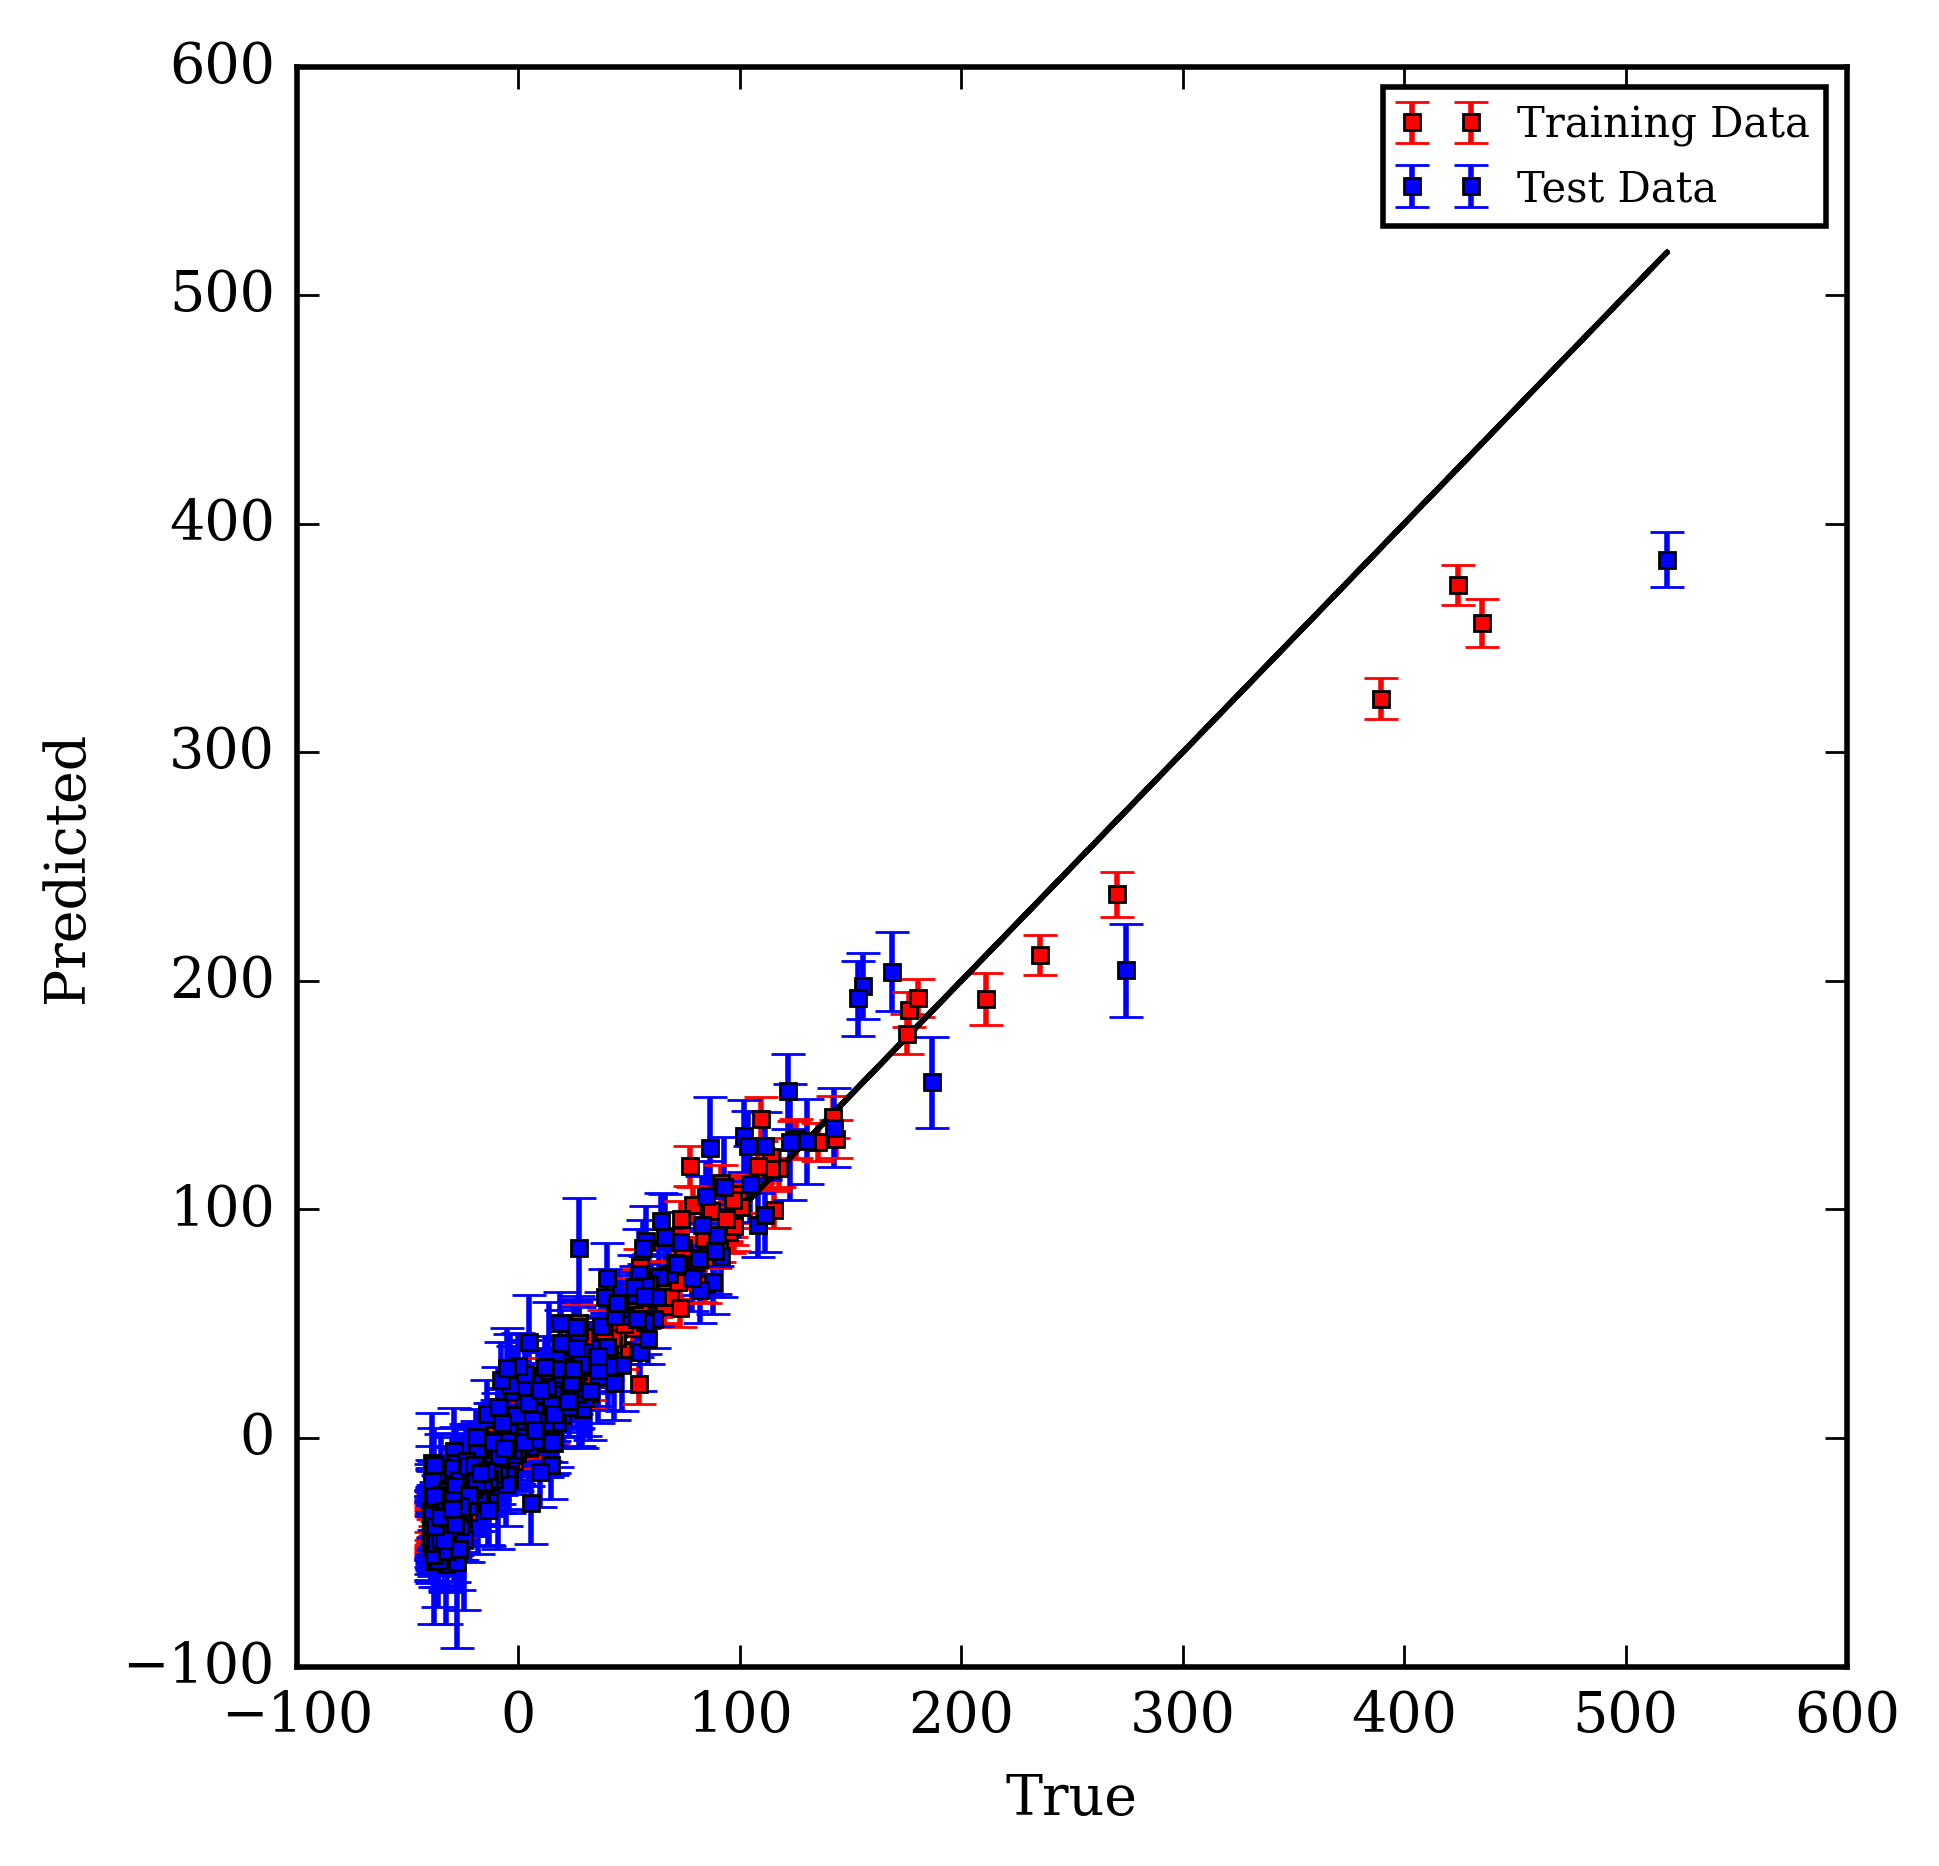

In [45]:
plt.style.use('classic')
rc('font',size=10)
rc('font',family='serif')
rc('axes',labelsize=10)
rc('text', usetex=False)
fig = plt.figure(figsize=(5, 5), dpi=400)
fig.patch.set_facecolor('xkcd:white')

plt.errorbar(gb_energy_train,mu_s_train_average,yerr=np.squeeze(sigma_s_train_average),c='r',fmt='o', marker='s',label='Training Data',ms=3)

plt.errorbar(gb_energy_test_average,mu_s_test_average,yerr=np.squeeze(sigma_s_test_average),c='b',fmt='o', marker='s',label='Test Data',ms=3)
plt.plot(gb_energy_test_average, gb_energy_test_average,c='k')
plt.plot(gb_energy_train, gb_energy_train,c='k')
fig.patch.set_facecolor('xkcd:white')

plt.xlabel('True')
plt.ylabel('Predicted')
plt.legend(fontsize=7.5)

plt.show()

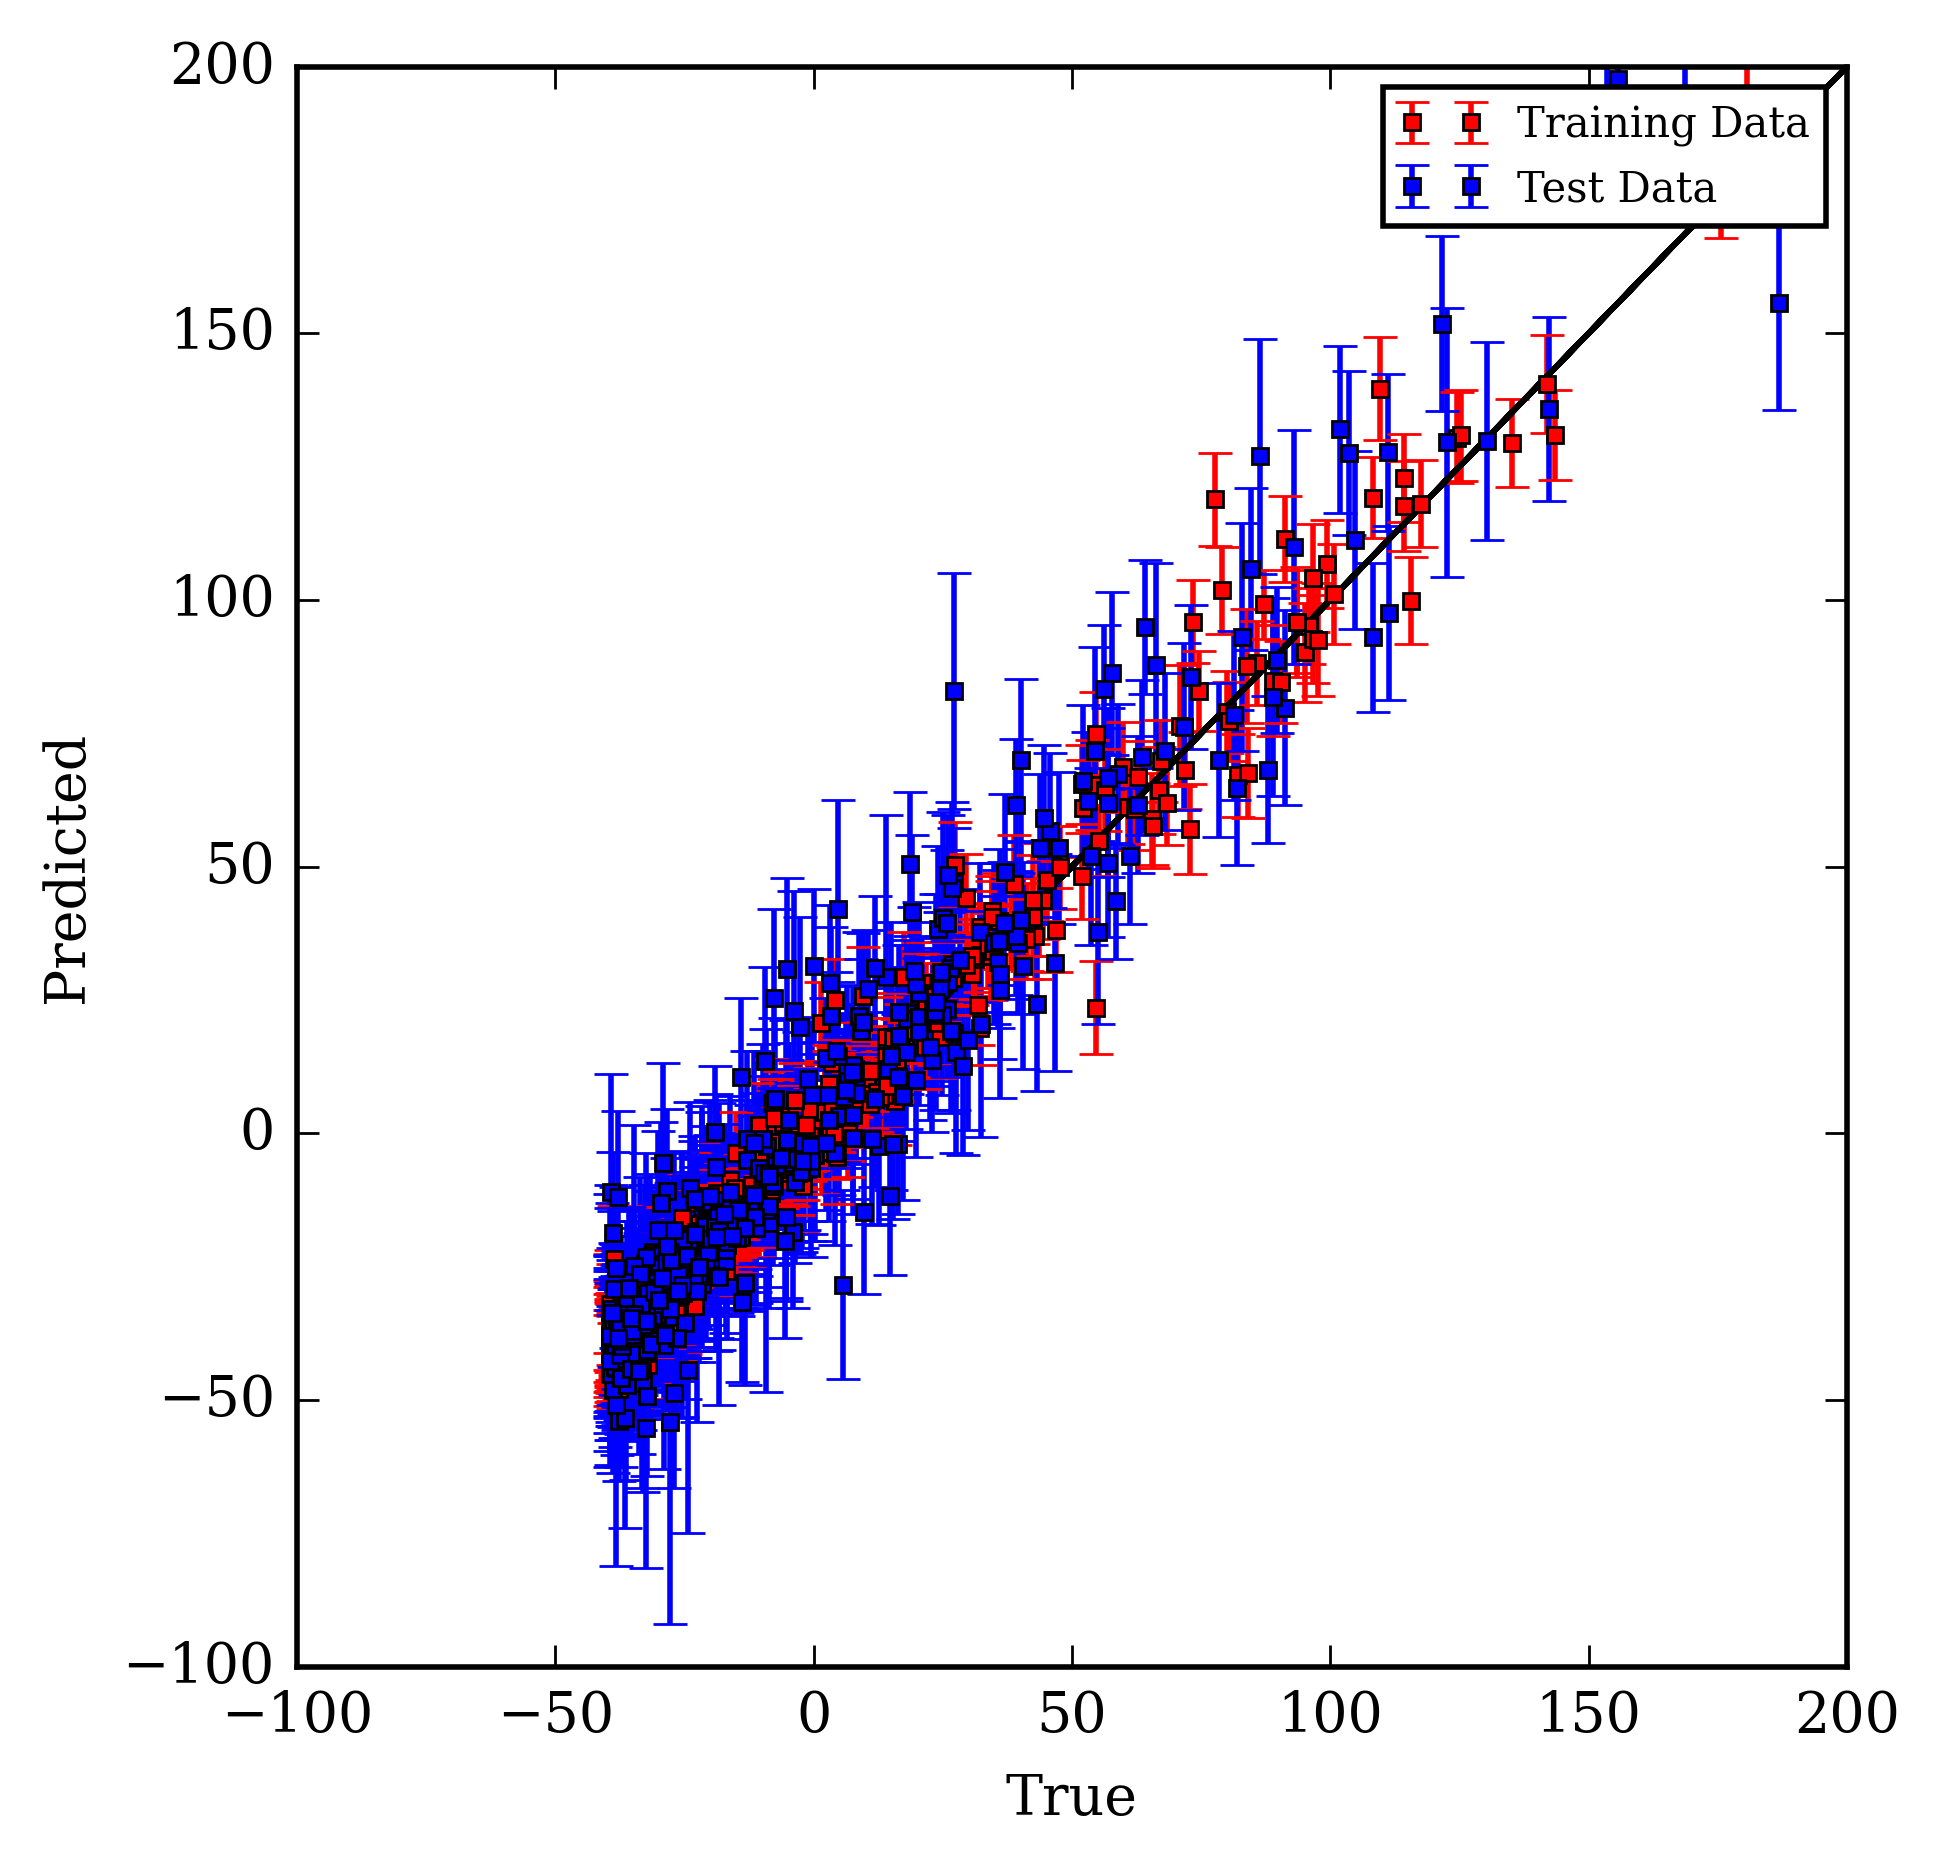

In [46]:
plt.style.use('classic')
rc('font',size=10)
rc('font',family='serif')
rc('axes',labelsize=10)
rc('text', usetex=False)
fig = plt.figure(figsize=(5, 5), dpi=400)
fig.patch.set_facecolor('xkcd:white')

plt.errorbar(gb_energy_train,mu_s_train_average,yerr=np.squeeze(sigma_s_train_average),c='r',fmt='o', marker='s',label='Training Data',ms=3)

plt.errorbar(gb_energy_test_average,mu_s_test_average,yerr=np.squeeze(sigma_s_test_average),c='b',fmt='o', marker='s',label='Test Data',ms=3)
plt.plot(gb_energy_test_average, gb_energy_test_average,c='k')
plt.plot(gb_energy_train, gb_energy_train,c='k')
fig.patch.set_facecolor('xkcd:white')

plt.xlabel('True')
plt.ylabel('Predicted')
plt.legend(fontsize=7.5)
plt.xlim([-100,200])
plt.ylim([-100,200])
plt.show()

In [47]:
# print('Average Uncertainty on the Test Set',np.mean(sigma_s_test_average))

rmse_gp = np.mean(np.sqrt(np.square(gb_energy_train-np.squeeze(mu_s_train_average))))
print('This is the mean of the root squared error for training data:',rmse_gp)
print('Average Uncertainty on the Train Set',np.mean(sigma_s_train_average))
print('\n')



rmse_test_gp= np.mean(np.sqrt(np.square(gb_energy_test_average-np.squeeze(mu_s_test_average))))
print('This is the mean of the root squared error for testing data:',rmse_test_gp)
print('Average Uncertainty on the Train Set',np.mean(sigma_s_test_average))

This is the mean of the root squared error for training data: 4.165725966824422
Average Uncertainty on the Train Set 7.956283196892124


This is the mean of the root squared error for testing data: 7.275355817121601
Average Uncertainty on the Train Set 14.767260783731938


/Users/dmonte/anaconda3/envs/GP_flow/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/dmonte/anaconda3/envs/GP_flow/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


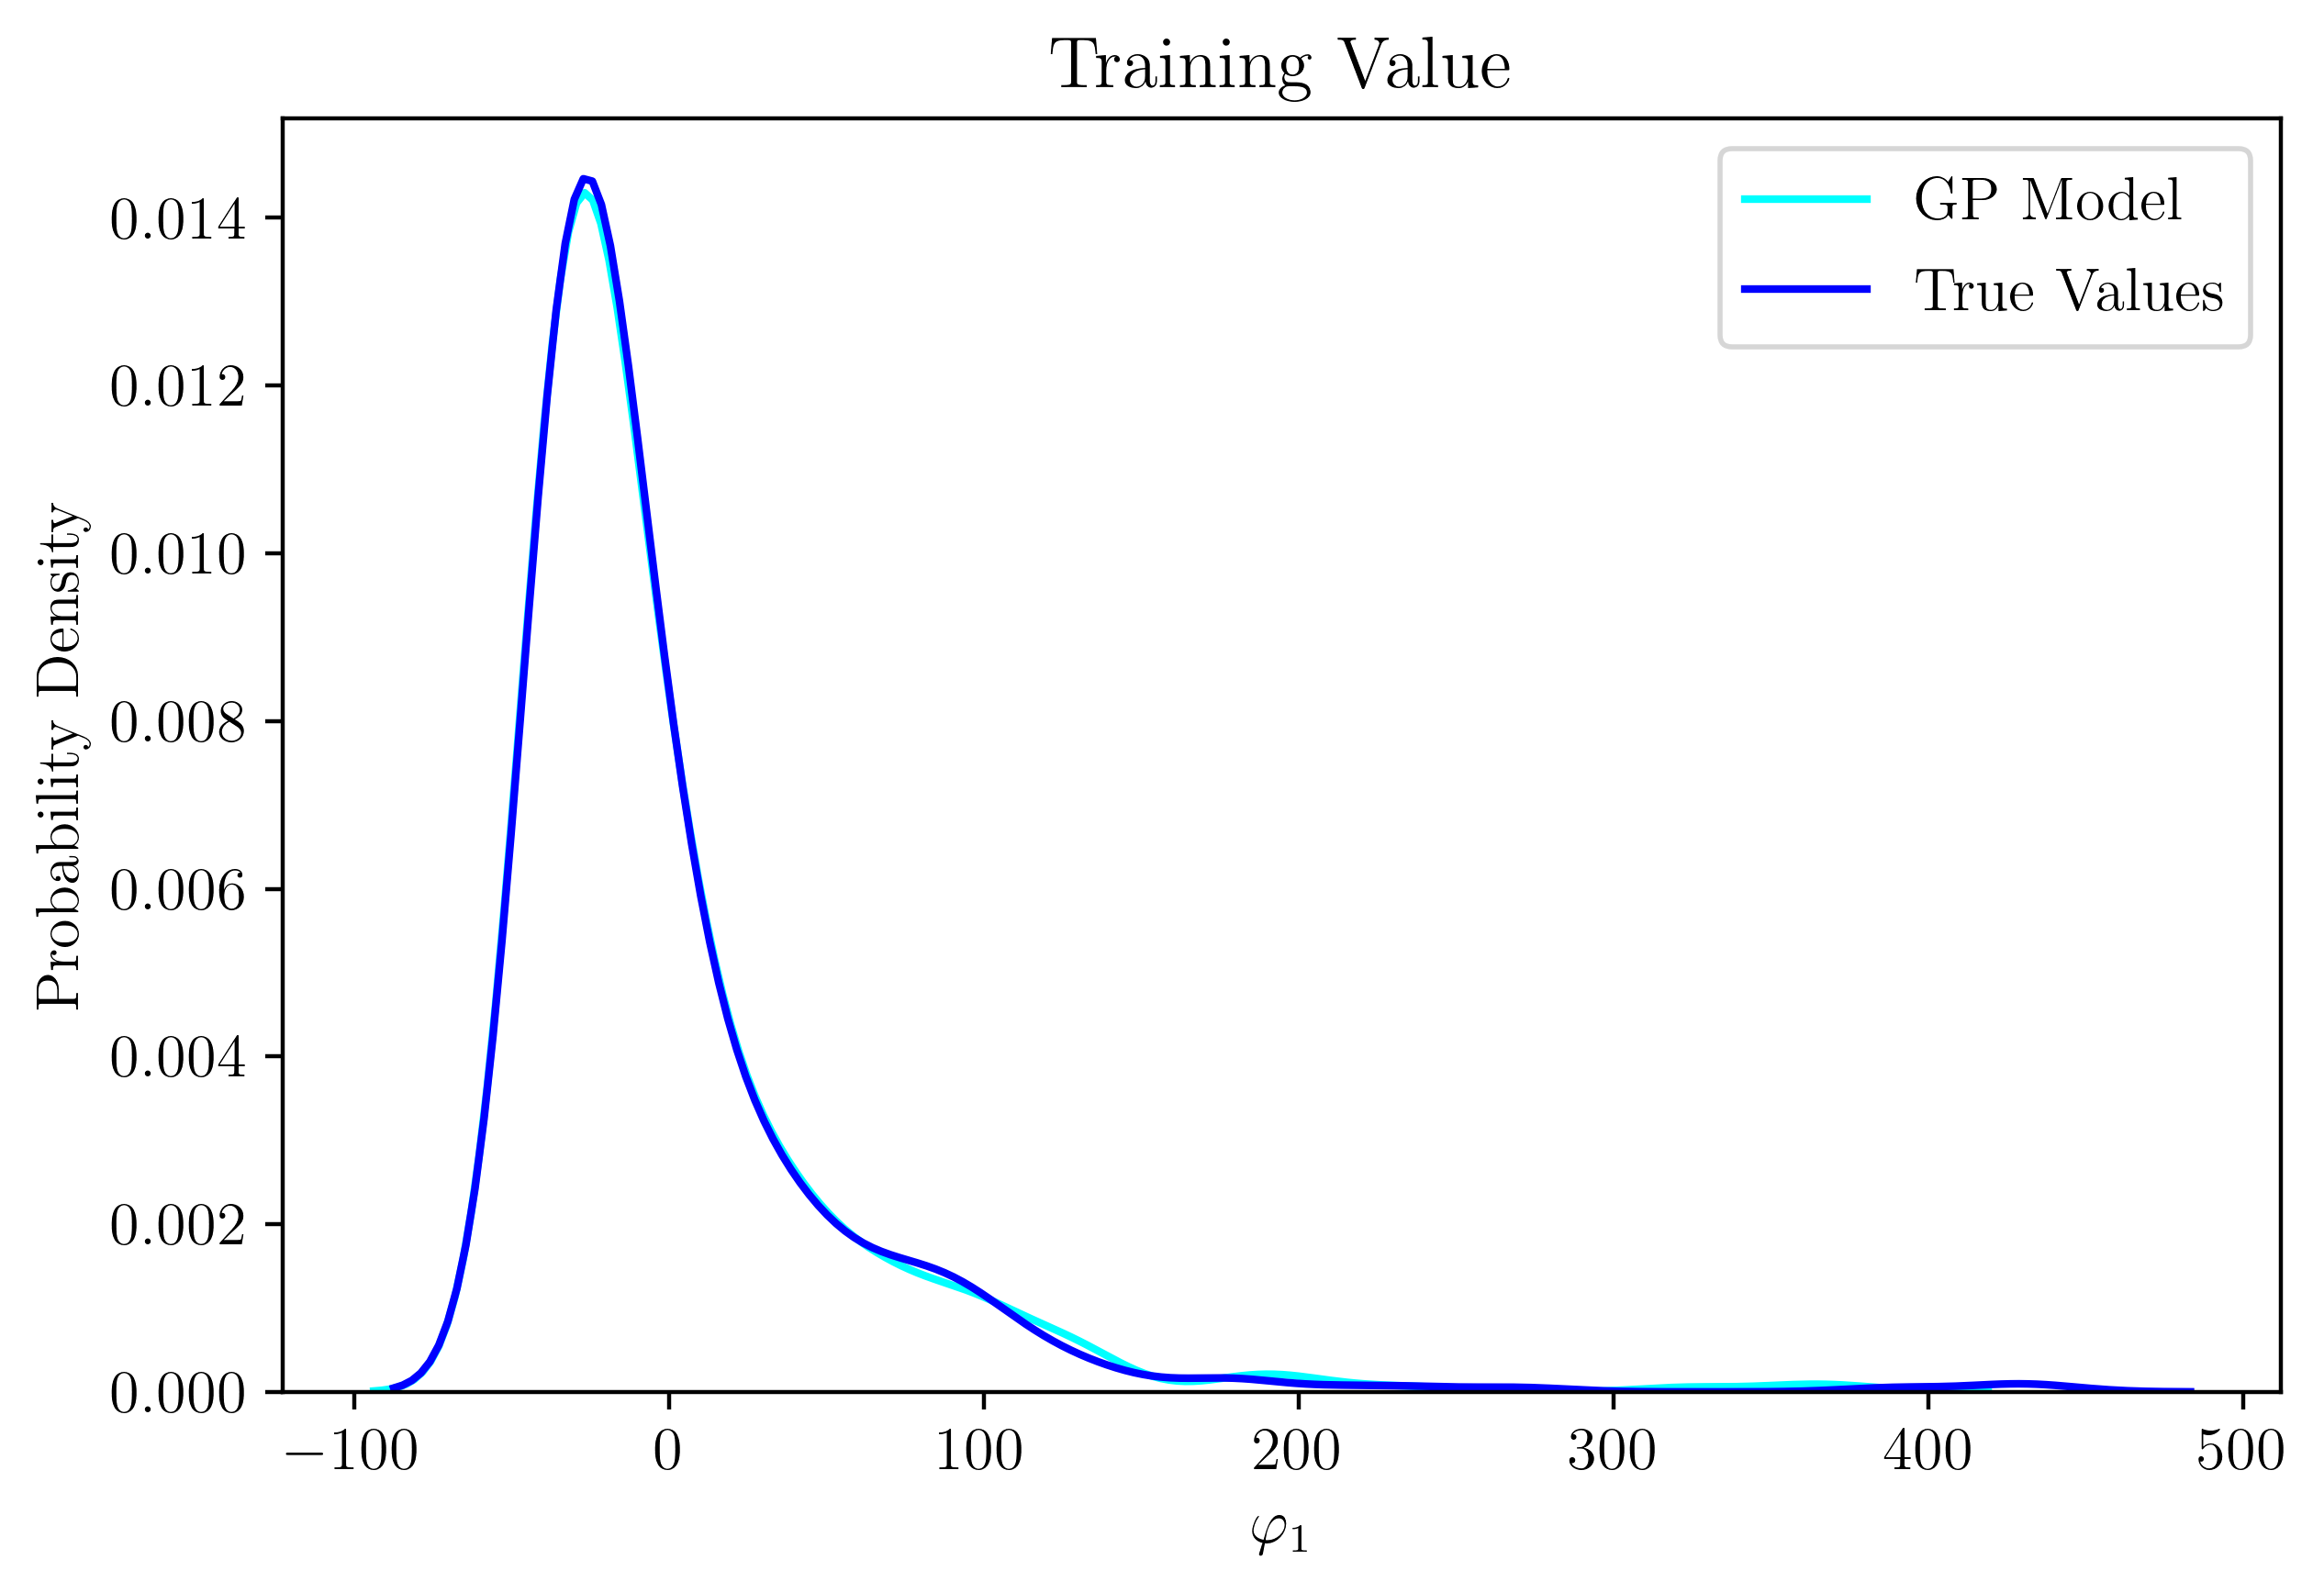

In [48]:
from matplotlib import rc
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import AutoLocator
from matplotlib.ticker import IndexLocator
from matplotlib.ticker import MaxNLocator

import matplotlib.style
import matplotlib as mpl
mpl.style.use('default')

rc('font',size=12)
rc('font',family='serif')
rc('axes',labelsize=12)
rc('text', usetex=True)



fig = plt.figure(figsize=(6.5, 4.5), dpi=400)


sns.distplot(mu_s_train_average, hist=False, kde=True, 
             bins=int(180/5), color = 'cyan',
             hist_kws={'edgecolor':'black'},label='GP Model')



sns.distplot(gb_energy_train, hist=False, kde=True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'},label='True Values')



# Add labels
plt.title('Training Value')
plt.ylabel('Probability Density')
plt.xlabel(r'$\mathbf{\varphi}_1$')
plt.legend(loc='best')


plt.tight_layout()
# plt.savefig('/Users/dmonte/Desktop/neural_network_mliaps/FusMat_project/paper/paper_images/entropy_on_W_QUAD.pdf',dpi=300)

/Users/dmonte/anaconda3/envs/GP_flow/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/dmonte/anaconda3/envs/GP_flow/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


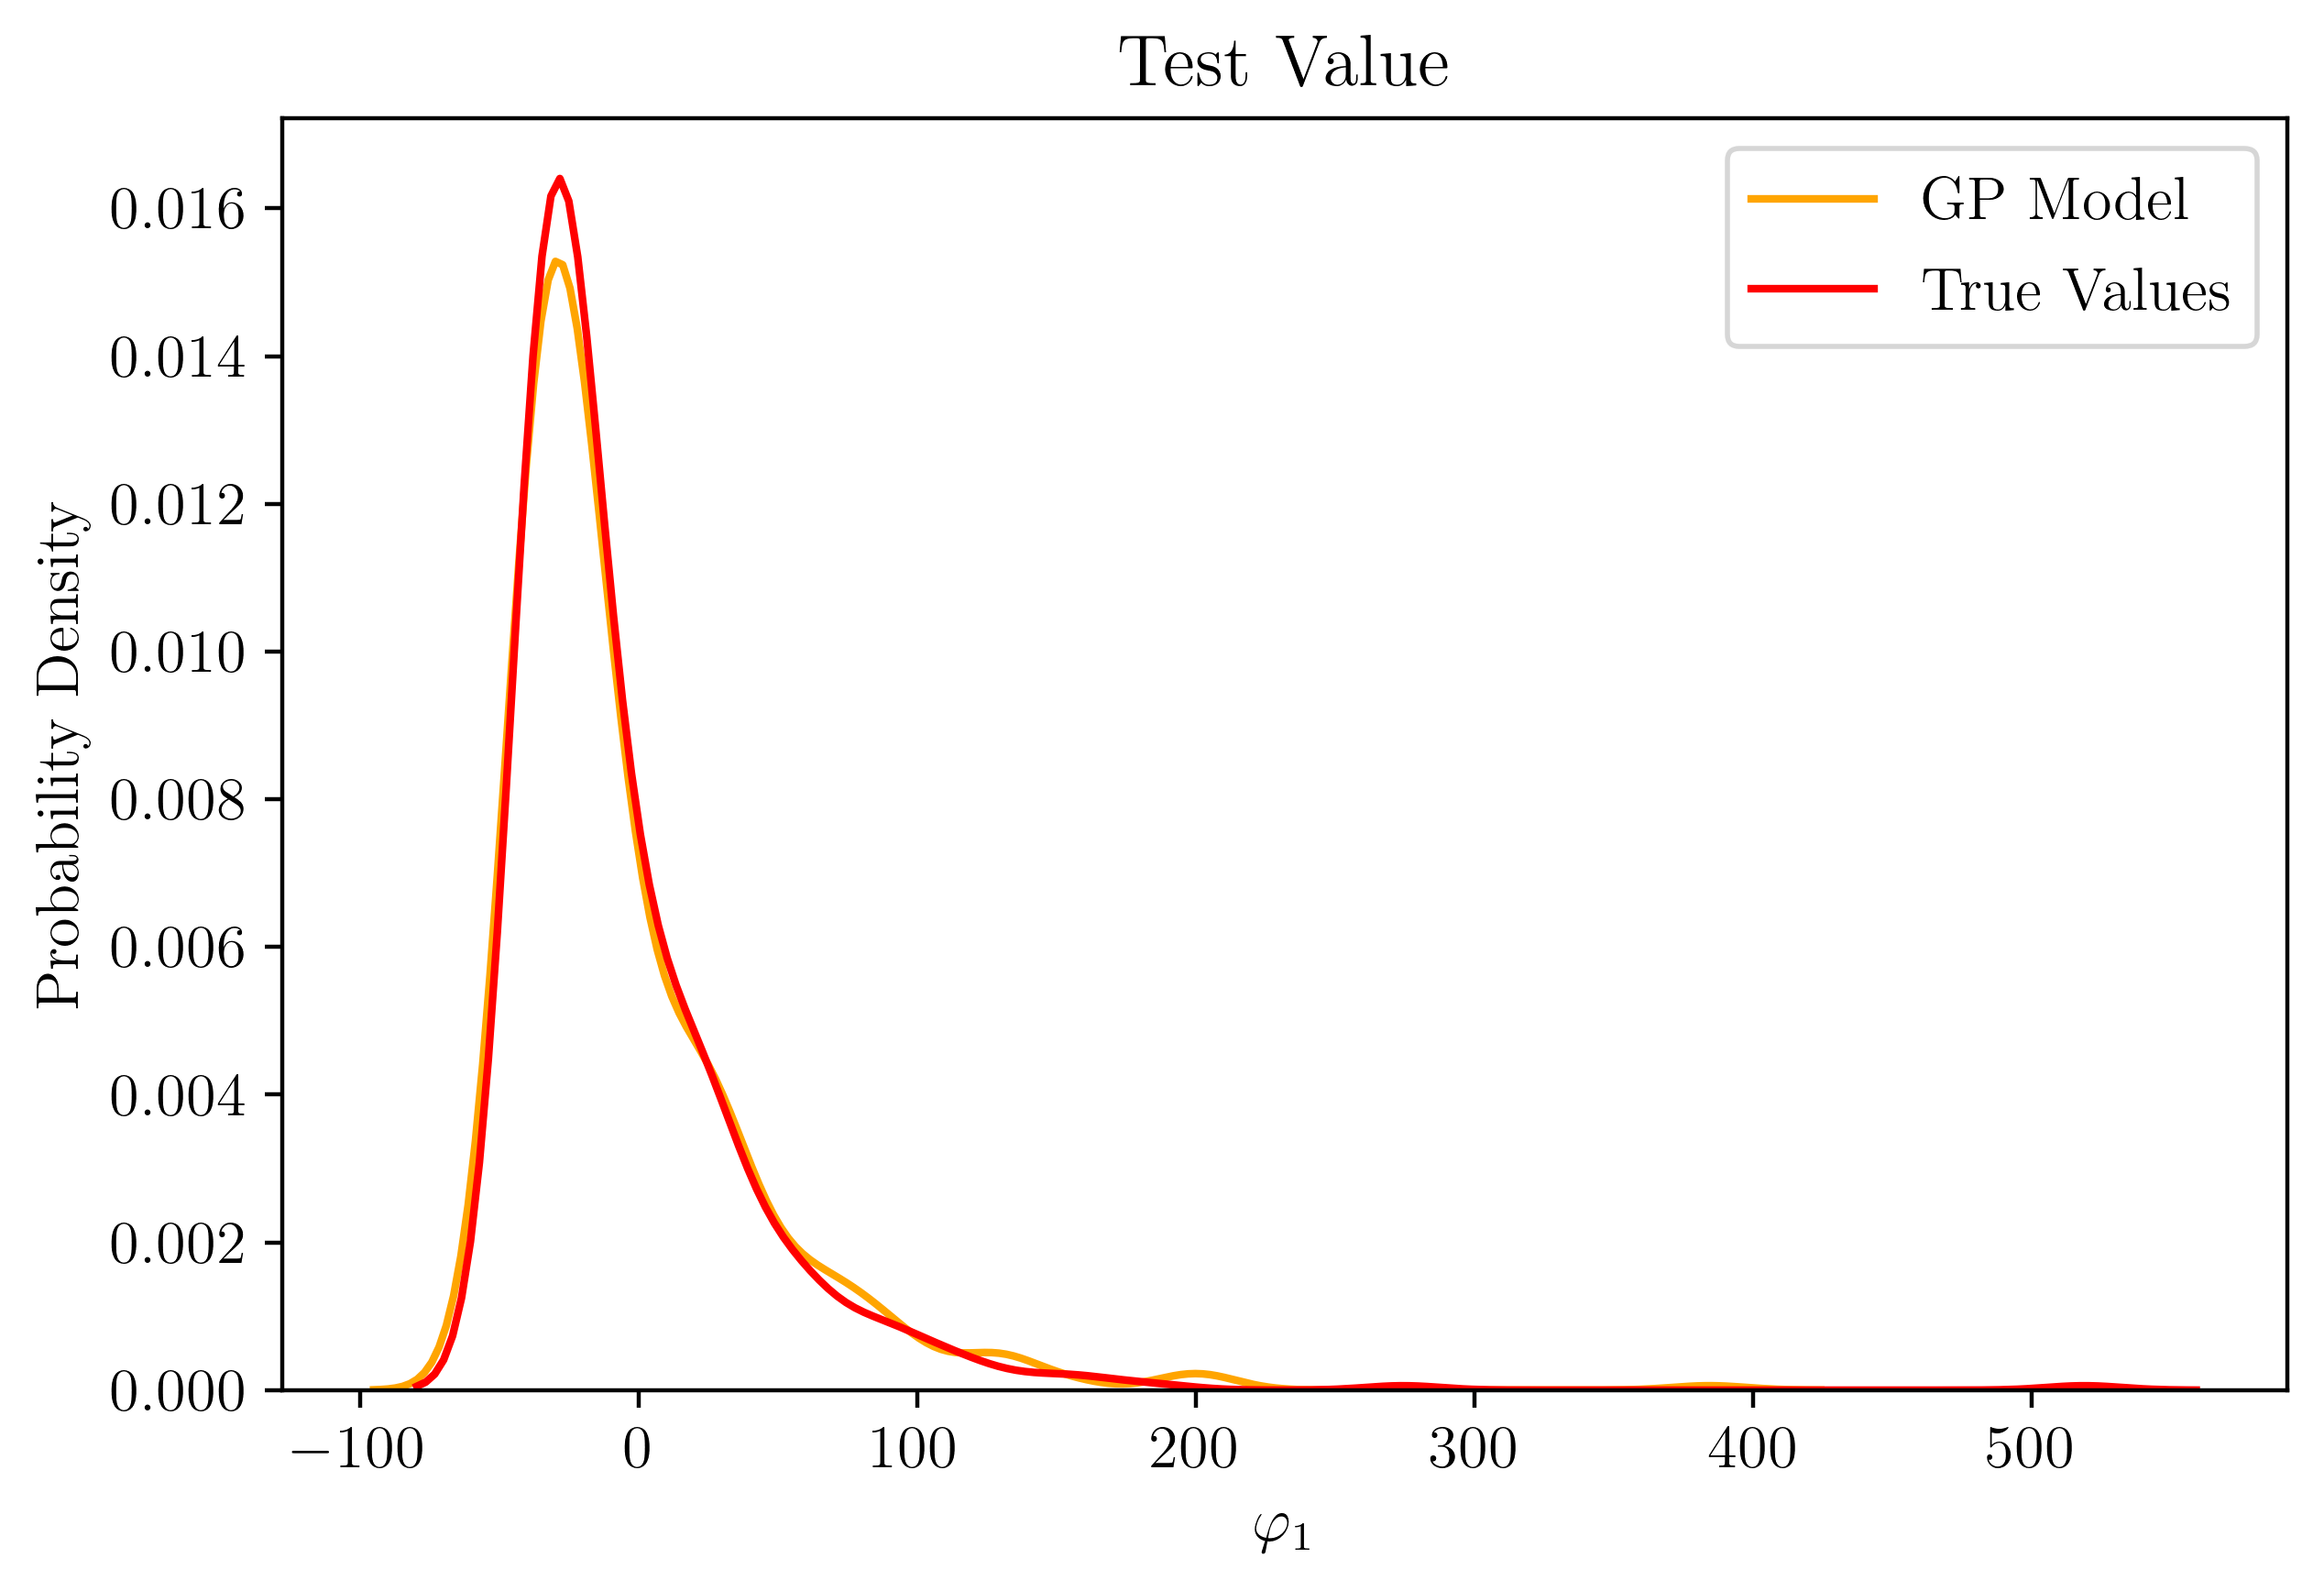

In [49]:
from matplotlib import rc
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import AutoLocator
from matplotlib.ticker import IndexLocator
from matplotlib.ticker import MaxNLocator

import matplotlib.style
import matplotlib as mpl
mpl.style.use('default')

rc('font',size=12)
rc('font',family='serif')
rc('axes',labelsize=12)
rc('text', usetex=True)



fig = plt.figure(figsize=(6.5, 4.5), dpi=400)


sns.distplot(mu_s_test_average, hist=False, kde=True, 
             bins=int(180/5), color = 'orange',
             hist_kws={'edgecolor':'black'},label='GP Model')



sns.distplot(gb_energy_test_average, hist=False, kde=True, 
             bins=int(180/5), color = 'red',
             hist_kws={'edgecolor':'black'},label='True Values')



# Add labels
plt.title('Test Value')
plt.ylabel('Probability Density')
plt.xlabel(r'$\mathbf{\varphi}_1$')
plt.legend(loc='best')


plt.tight_layout()
# plt.savefig('/Users/dmonte/Desktop/neural_network_mliaps/FusMat_project/paper/paper_images/entropy_on_W_QUAD.pdf',dpi=300)

In [50]:
r_sq_train_1=np.sqrt(np.square(gb_energy_train-np.squeeze(mu_s_train_average)))
r_sq_test_1=np.sqrt(np.square(gb_energy_test_average-np.squeeze(mu_s_test_average)))

In [51]:
print(r_sq_train_1.max() , r_sq_test_1.max())
print(r_sq_train_1. mean() , r_sq_test_1.mean())
print(np.median(r_sq_train_1) , np.median(r_sq_test_1))
print('These are the parameters of the Max Training Error')
print(np.array(parameters)[r_sq_train_1==r_sq_train_1.max()])

print('This is the input file of the outlier')
print(np.array(list_params)[r_sq_train_1==r_sq_train_1.max()])


print('This is the input file of the outlier')
print(np.array(gb_energy_train)[r_sq_train_1==r_sq_train_1.max()],np.array(mu_s_train_average)[r_sq_train_1==r_sq_train_1.max()])

78.74207643937444 134.5265893069302
4.165725966824422 7.275355817121601
2.2996468890609147 4.121793308856416
These are the parameters of the Max Training Error
[[3.5762596  0.07321435 0.13436813 1.03225202 1.00836032]]
This is the input file of the outlier
['params.in.351']
This is the input file of the outlier
[435.27346218] [[356.53138574]]


In [52]:
indx_ts_trained_test_all1=1*np.ones([len(r_sq_test_1),1])
indx_ts_trained_train_all1=1*np.ones([len(r_sq_train_1),1])

all_vals_test=np.concatenate([r_sq_test_1])
print(all_vals_test.shape)
indx_ts_trained_test_all=np.concatenate([indx_ts_trained_test_all1,])


all_vals_train=np.concatenate([r_sq_train_1])
indx_ts_trained_train_all=np.concatenate([indx_ts_trained_train_all1])
print(all_vals_train.shape)



model_list_test=[]
model_list_train=[]


for i in range(len(all_vals_test)):
    model_list_test.append('Test')
    
for i in range(len(all_vals_train)):
    model_list_train.append('Train')
    
    
    
for i in model_list_test:
    model_list_train.append(i)
    
    
    
print(len(model_list_train))    

indexs=np.squeeze(np.concatenate([indx_ts_trained_train_all,indx_ts_trained_test_all]))
print(indexs.shape)
all_vals=np.squeeze(np.concatenate([all_vals_train,all_vals_test]))
print(all_vals.shape)
print(len(model_list_train))


series_indxs=pd.Series(indexs,name='pos')
series_nature=pd.Series(model_list_train,name='Model')
series_vals=pd.Series(all_vals,name='Values')


dist_df=pd.concat([series_indxs,series_vals, series_nature], axis=1)

(500,)
(500,)
1000
(1000,)
(1000,)
1000


<Figure size 3000x3000 with 0 Axes>

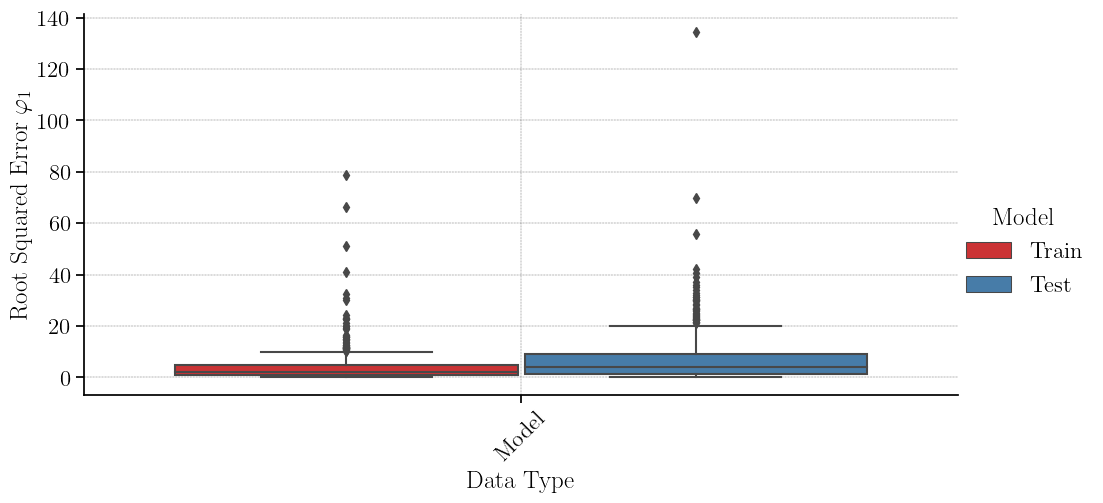

In [53]:
import seaborn as sns
from matplotlib import rc
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import AutoLocator
from matplotlib.ticker import IndexLocator
from matplotlib.ticker import MaxNLocator

import matplotlib.style
import matplotlib as mpl
mpl.style.use('default')

rc('font',size=12)
rc('font',family='serif')
rc('axes',labelsize=12)
rc('text', usetex=True)



fig = plt.figure(figsize=(7.5, 7.5), dpi=400)
fig.patch.set_facecolor('xkcd:white')

sns.set_context("notebook", font_scale=1.5)

g=sns.catplot(x="pos", y="Values", hue="Model",
            kind="box", data=dist_df,
              height=5,aspect=2,palette='Set1',)


(g.set_axis_labels("Data Type", r"Root Squared Error $\mathbf{\varphi}_1$ ")
  .set_xticklabels(['Model'],rotation=45) 
  .despine(left=False))


plt.grid(color='k', linestyle='-.', linewidth=.2,which='both')

# plt.legend()

# plt.savefig('new_paper_figs/TSMARS_normalized_distance_last_tf_frame_predicted.pdf', 
#            dpi=300)

<Figure size 3000x3000 with 0 Axes>

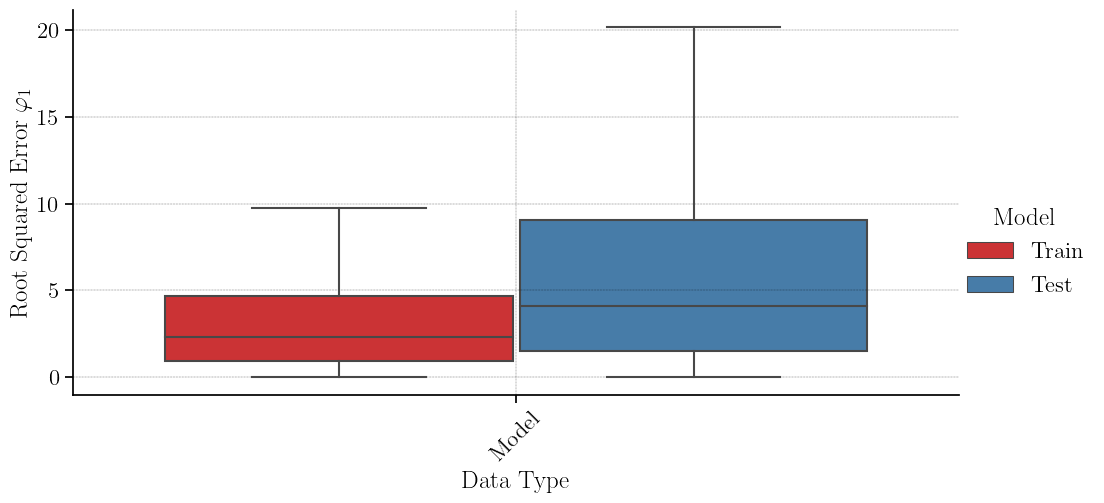

In [54]:
import seaborn as sns
from matplotlib import rc
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import AutoLocator
from matplotlib.ticker import IndexLocator
from matplotlib.ticker import MaxNLocator

import matplotlib.style
import matplotlib as mpl
mpl.style.use('default')

rc('font',size=12)
rc('font',family='serif')
rc('axes',labelsize=12)
rc('text', usetex=True)



fig = plt.figure(figsize=(7.5, 7.5), dpi=400)
fig.patch.set_facecolor('xkcd:white')

sns.set_context("notebook", font_scale=1.5)

g=sns.catplot(x="pos", y="Values", hue="Model",
            kind="box", data=dist_df,
              height=5,aspect=2,palette='Set1',showfliers=False)


(g.set_axis_labels("Data Type", r"Root Squared Error $\mathbf{\varphi}_1$ ")
  .set_xticklabels(['Model'],rotation=45) 
  .despine(left=False))


plt.grid(color='k', linestyle='-.', linewidth=.2,which='both')

# plt.legend()

# plt.savefig('new_paper_figs/TSMARS_normalized_distance_last_tf_frame_predicted.pdf', 
#            dpi=300)

/Users/dmonte/anaconda3/envs/GP_flow/lib/python3.6/site-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  # This is added back by InteractiveShellApp.init_path()
/Users/dmonte/anaconda3/envs/GP_flow/lib/python3.6/site-packages/ipykernel_launcher.py:20: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.


This is the RMSE for training data: 4.165725966824422
This is the std RSE for training data: 0.0
This is the RMSE for testing data: 7.275355817121601
This is the std on RSE for testing data: 0.0


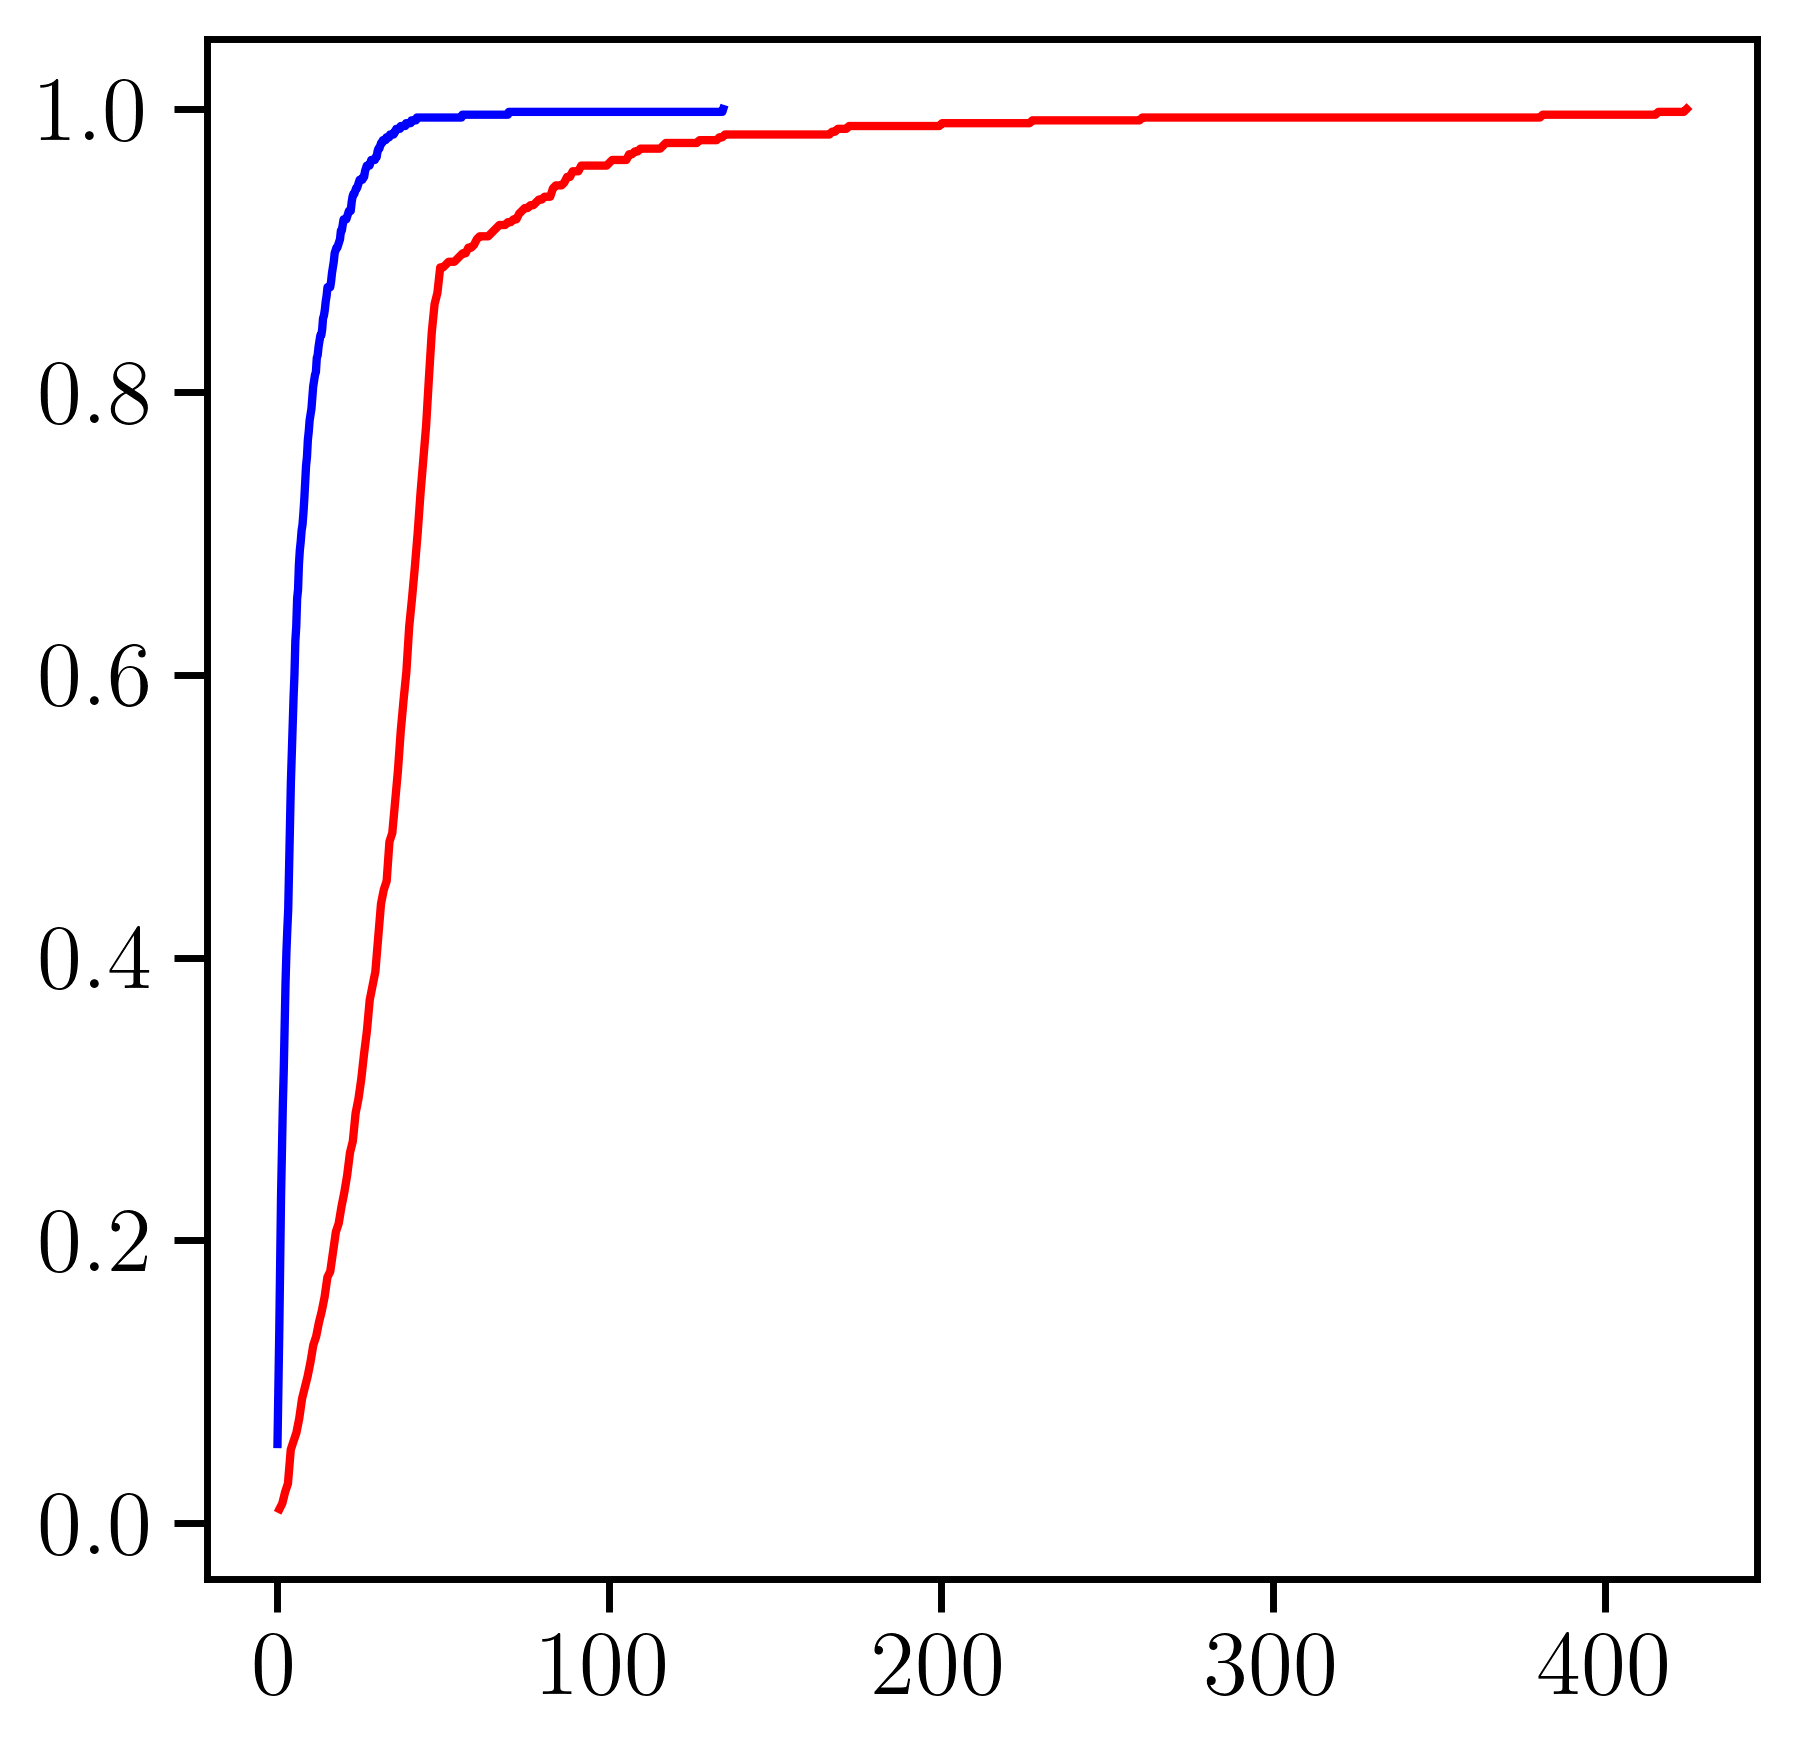

In [55]:
n_bins=500
rc('font',size=10)
rc('font',family='serif')
rc('axes',labelsize=10)
rc('text', usetex=True)
fig = plt.figure(figsize=(5, 5), dpi=400)
fig.patch.set_facecolor('xkcd:white')


num_bins = n_bins
counts, bin_edges = np.histogram (np.sqrt(np.square(gb_energy_train-np.squeeze(sigma_s_train_average))), bins=num_bins, normed=True)
cdf = np.cumsum (counts)
plt.plot (bin_edges[1:], cdf/cdf[-1],color='r')

print('This is the RMSE for training data:',np.mean(rmse_gp))
print('This is the std RSE for training data:',np.std(rmse_gp))


num_bins = n_bins
counts, bin_edges = np.histogram (np.sqrt(np.square(gb_energy_test_average-np.squeeze(mu_s_test_average))), bins=num_bins, normed=True)
cdf = np.cumsum (counts)
plt.plot (bin_edges[1:], cdf/cdf[-1],color='b')

print('This is the RMSE for testing data:',np.mean(rmse_test_gp))
print('This is the std on RSE for testing data:',np.std(rmse_test_gp))


/Users/dmonte/anaconda3/envs/GP_flow/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':
/Users/dmonte/anaconda3/envs/GP_flow/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/Users/dmonte/anaconda3/envs/GP_flow/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log10
  if sys.path[0] == '':
/Users/dmonte/anaconda3/envs/GP_flow/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]


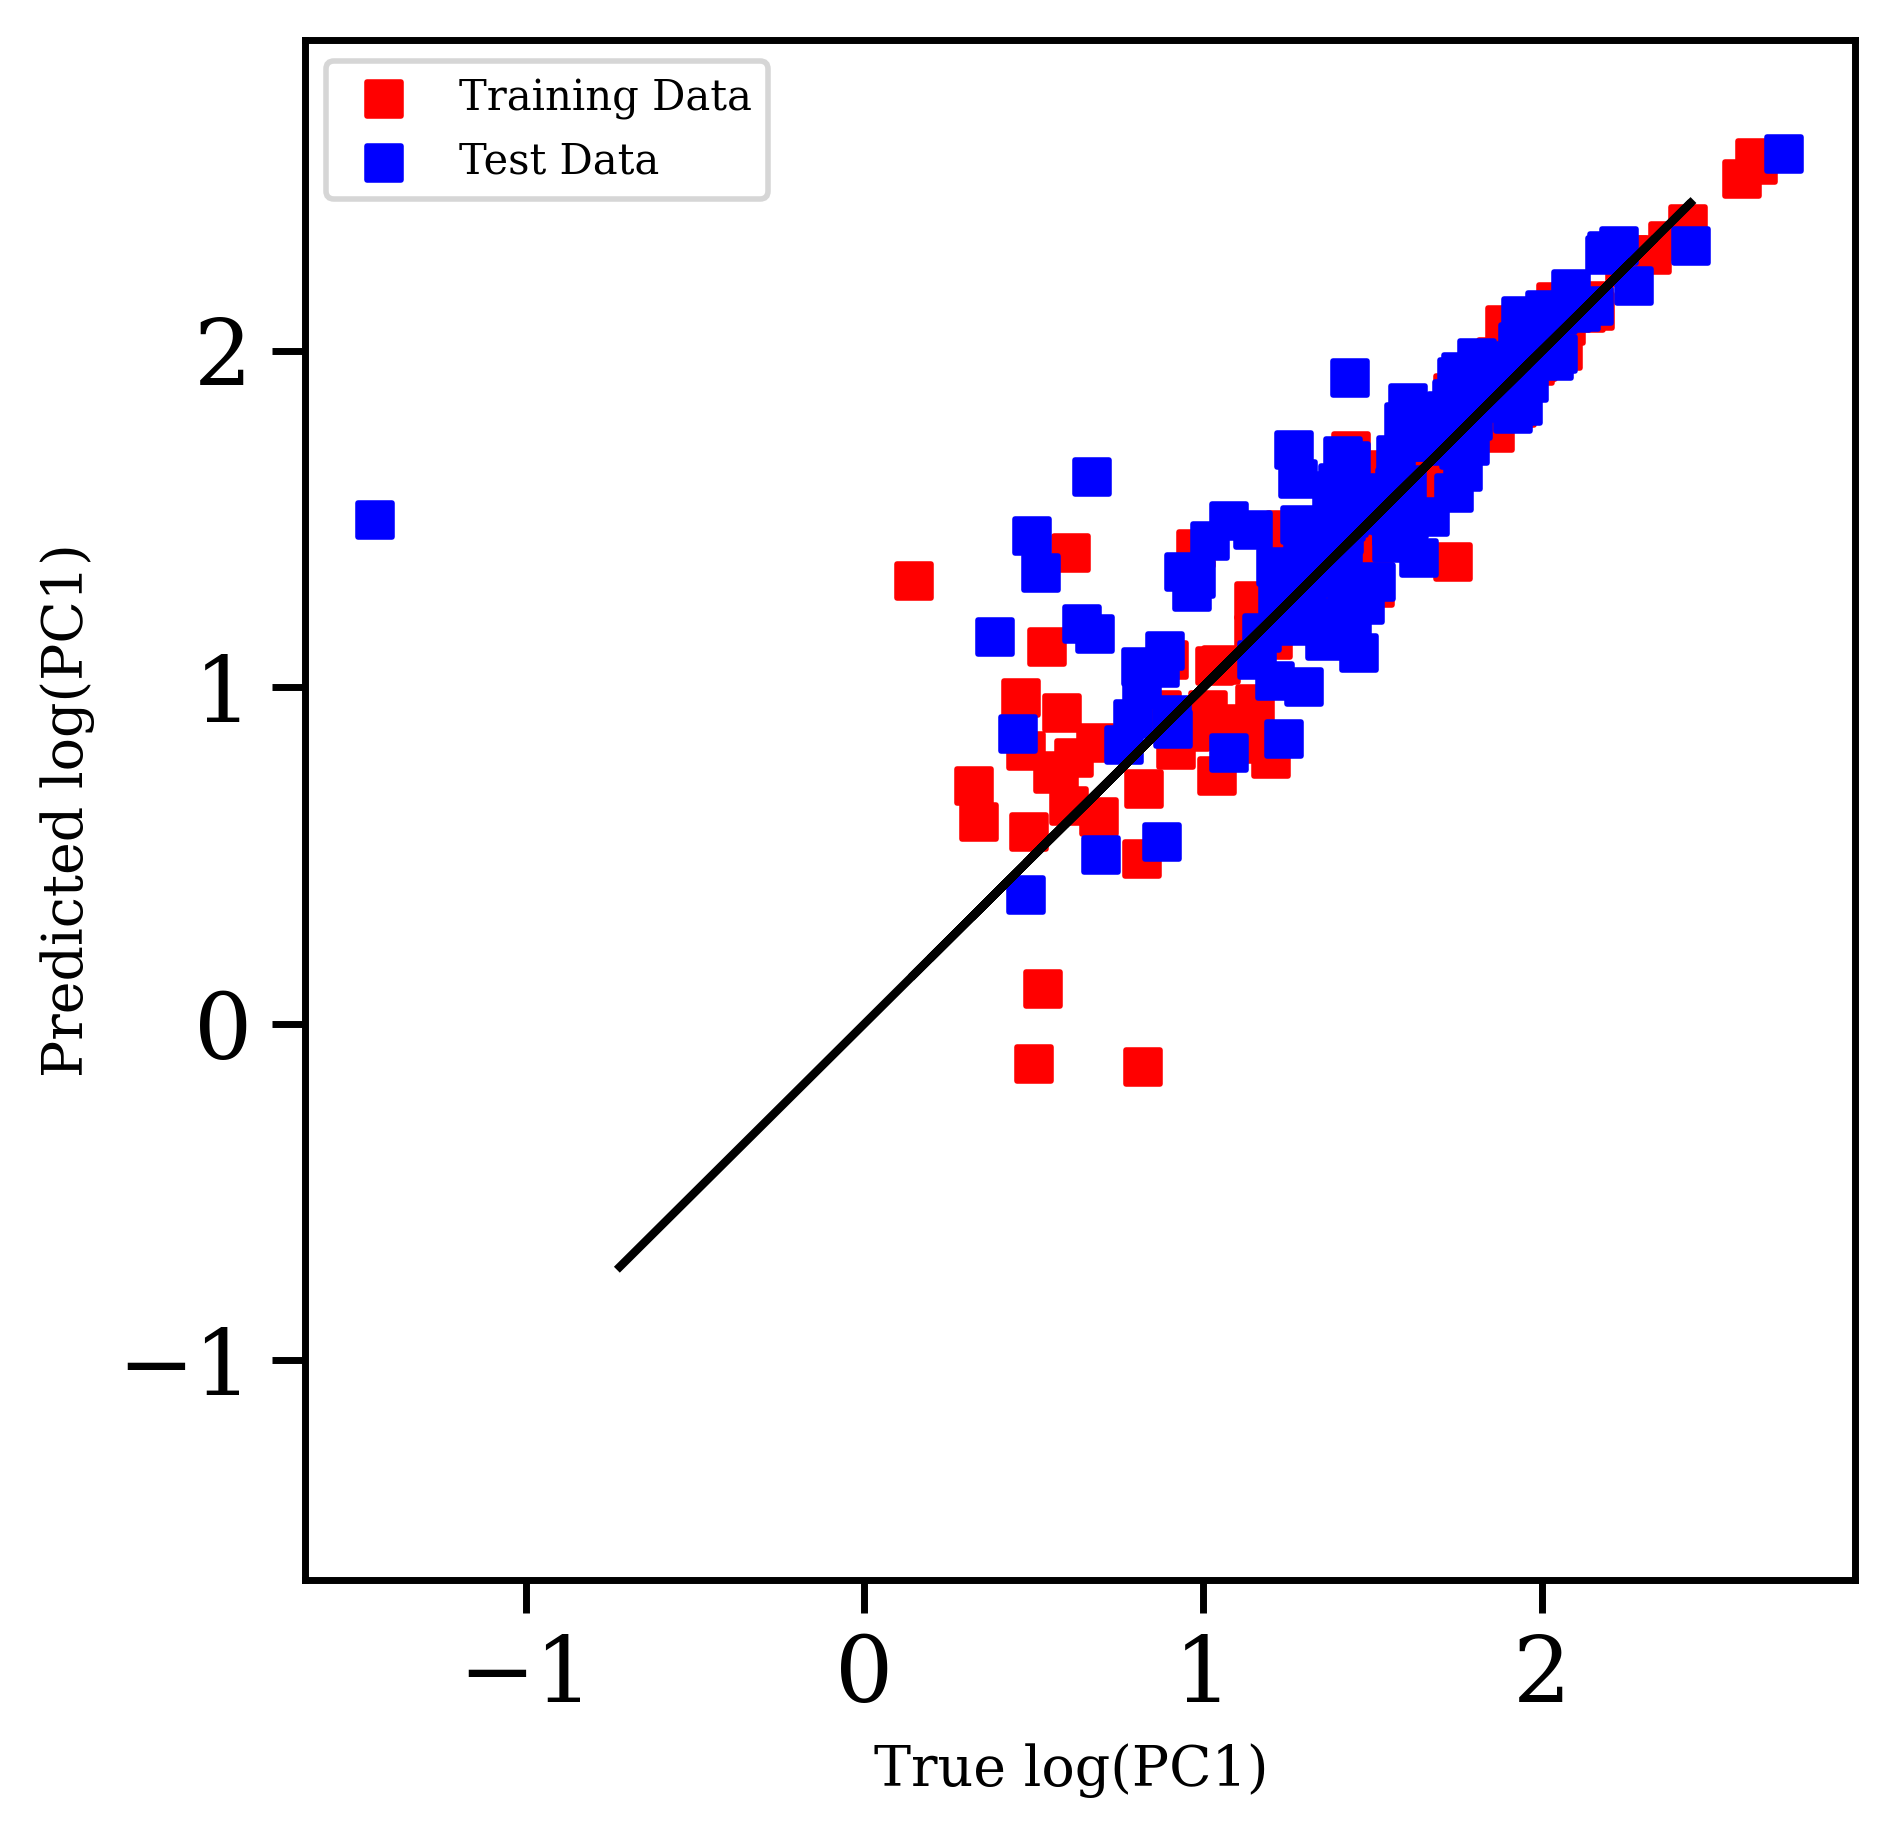

In [56]:
center_mean=0
rc('font',size=10)
rc('font',family='serif')
rc('axes',labelsize=10)
rc('text', usetex=False)
fig = plt.figure(figsize=(5, 5), dpi=400)
fig.patch.set_facecolor('xkcd:white')

plt.scatter(np.log10(gb_energy_train),np.log10(mu_s_train_average),c='r', marker='s',label='Training Data')

plt.scatter(np.log10(gb_energy_test_average+center_mean),np.log10(mu_s_test_average+center_mean),c='b', marker='s',label='Test Data')
plt.plot(np.log10(gb_energy_test_average+center_mean), np.log10(gb_energy_test_average+center_mean),c='k')
plt.plot(np.log10(gb_energy_train), np.log10(gb_energy_train),c='k')
fig.patch.set_facecolor('xkcd:white')

plt.xlabel('True log(PC1) ')
plt.ylabel('Predicted log(PC1)')
plt.legend(fontsize=7.5)

plt.show()